In [1]:
# numpy and pandas for data manipulation
import numpy as np
import pandas as pd

# File system manangement
import os

# evalute time
import time

# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

# matplotlib and seaborn for plotting
import matplotlib.pyplot as plt
import seaborn as sns

# plotly for more interactive visualizations
import plotly.graph_objs as go
import plotly.tools as tls
from plotly.offline import iplot, init_notebook_mode
import plotly.figure_factory as ff

init_notebook_mode(connected=True)

# Data Pre-processing
from sklearn import preprocessing

# Predictive Modelling
import xgboost as xgb

In [259]:
# List files available
print(os.listdir("C:/Users/VenD/Downloads/ieee-fraud-detection/dataset"))

['sample_submission.csv', 'test_identity.csv', 'test_transaction.csv', 'train_identity.csv', 'train_transaction.csv']


In [260]:
def read_dataset(path):
    df = pd.read_csv(path)
    print("Dataset shape: ", df.shape)
    return df

In [261]:
%%time

train_transaction_df = read_dataset("C:/Users/VenD/Downloads/ieee-fraud-detection/dataset/train_transaction.csv")

Dataset shape:  (590540, 394)
Wall time: 20.2 s


In [262]:
train_transaction_df.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2987003,0,86499,50.0,W,18132,567.0,150.0,mastercard,117.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2987004,0,86506,50.0,H,4497,514.0,150.0,mastercard,102.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [263]:
%%time

train_identity_df = read_dataset("C:/Users/VenD/Downloads/ieee-fraud-detection/dataset/train_identity.csv")
train_identity_df.head()

Dataset shape:  (144233, 41)
Wall time: 522 ms


In [264]:
train_identity_df.head()

,TransactionID,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987004,0.0,70787.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,samsung browser 6.2,32.0,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M
1,2987008,-5.0,98945.0,NaN,NaN,0.0,-5.0,NaN,NaN,NaN,...,mobile safari 11.0,32.0,1334x750,match_status:1,T,F,F,T,mobile,iOS Device
2,2987010,-5.0,191631.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,...,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,Windows
3,2987011,-5.0,221832.0,NaN,NaN,0.0,-6.0,NaN,NaN,NaN,...,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,NaN
4,2987016,0.0,7460.0,0.0,0.0,1.0,0.0,NaN,NaN,0.0,...,chrome 62.0,24.0,1280x800,match_status:2,T,F,T,T,desktop,MacOS


In [2]:
# Function to reduce the DF size
def reduce_memory_usage(df, verbose=True):
    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    df_memory_size_in_mega_bytes = df.memory_usage().sum() / 1024**2
    for col in df.columns:
        col_data_type = df[col].dtypes
        if col_data_type in numerics:
            col_min = df[col].min()
            col_max = df[col].max()
            if str(col_data_type)[:3] == 'int':
                if col_min > np.iinfo(np.int8).min and col_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif col_min > np.iinfo(np.int16).min and col_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif col_min > np.iinfo(np.int32).min and col_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif col_min > np.iinfo(np.int64).min and col_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64) 
            else:
                if col_min > np.finfo(np.float16).min and col_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif col_min > np.finfo(np.float32).min and col_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                elif col_min > np.finfo(np.float64).min and col_max < np.finfo(np.float64).max:
                    df[col] = df[col].astype(np.float64)
                    
    reduced_df_memory_size_in_mega_bytes = df.memory_usage().sum() / 1024**2
    
    memory_diff = (df_memory_size_in_mega_bytes - reduced_df_memory_size_in_mega_bytes)
    reduce_percent =  (memory_diff / df_memory_size_in_mega_bytes) * 100
    
    if verbose:
        print('Memory usage decreased from {:5.2f} Mb to {:5.2f} Mb ({:.1f}% reduction)' \
              .format(df_memory_size_in_mega_bytes, reduced_df_memory_size_in_mega_bytes, reduce_percent))
        
    return df

In [266]:
%%time

train_transaction_df = reduce_memory_usage(train_transaction_df)
train_identity_df = reduce_memory_usage(train_identity_df)

Memory usage decreased from 1775.15 Mb to 542.35 Mb (69.4% reduction)
Memory usage decreased from 45.12 Mb to 25.86 Mb (42.7% reduction)
Wall time: 2min 47s


In [267]:
# Function to get summary of DataFrame
def summary_table(df):
    summary = pd.DataFrame(df.dtypes, columns=['dtypes'])
    summary = summary.reset_index()
    summary['Name'] = summary['index']
    summary = summary[['Name', 'dtypes']]
    summary['Missing %'] = ((df.isnull().sum().values) / len(df)) * 100
    summary['Unique'] = df.nunique().values
    
    summary = summary.sort_values('Missing %', ascending=False)
    
    return summary

In [268]:
%%time

numeric_cols_df = train_transaction_df.select_dtypes(exclude='object')
transaction_summary_df = summary_table(numeric_cols_df)

Wall time: 7.83 s


In [269]:
transaction_summary_df.head(10)

,Name,dtypes,Missing %,Unique
11,dist2,float16,93.628374,1699
32,D7,float16,93.409930,597
38,D13,float16,89.509263,577
39,D14,float16,89.469469,802
37,D12,float16,89.041047,635
31,D6,float16,87.606767,829
34,D9,float16,87.312290,24
33,D8,float16,87.312290,5367
194,V154,float16,86.123717,19
195,V155,float16,86.123717,25


# Exploratory Data Analysis (EDA)

### Target Distribution

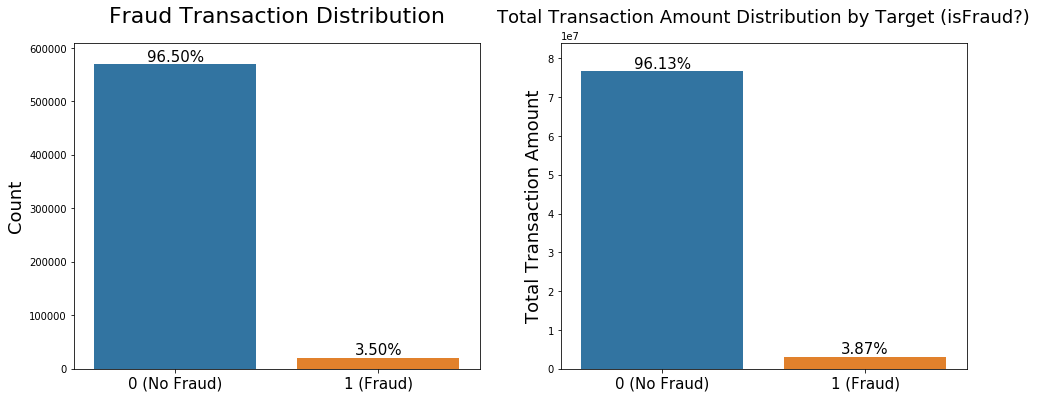

In [270]:
# Target Distribution

train_transaction_df['TransactionAmt'] = train_transaction_df['TransactionAmt'].astype(float)
total_amt = train_transaction_df.groupby(['isFraud'])['TransactionAmt'].sum().sum()
total = len(train_transaction_df)

total_amt_by_target = train_transaction_df.groupby(['isFraud'])['TransactionAmt'].sum().reset_index()

plt.figure(figsize=(16,6))

# no.of rows, no. of cols, plot_no
plt.subplot(121)

ax = sns.countplot(x='isFraud', data=train_transaction_df)

ax.set_title("Fraud Transaction Distribution", fontsize=22, pad=20.0)
ax.set_xlabel('')
ax.set_ylabel('Count', fontsize=18)
ax.set_ylim(0, 610000)
ax.set_xticklabels(['0 (No Fraud)', '1 (Fraud)'], fontsize=15)

h_lst = [p.get_height() for p in ax.patches]
pad = max(h_lst) * 0.01

for p in ax.patches:
    height = p.get_height()
    if np.isnan(height):
        continue
    ax.text(p.get_x() + p.get_width() / 2.0,
            height + pad,
            '{:1.2f}%'.format(height / total * 100),
            ha="center", fontsize=15)
    
plt.subplot(122)

ax1 = sns.barplot(x='isFraud', y='TransactionAmt', data=total_amt_by_target)

ax1.set_title("Total Transaction Amount Distribution by Target (isFraud?)", fontsize=18, pad=20.0)
ax1.set_xlabel('')
ax1.set_ylabel('Total Transaction Amount', fontsize=18)
ax1.set_ylim(0, 84055213)
ax1.set_xticklabels(['0 (No Fraud)', '1 (Fraud)'], fontsize=15)

h_lst = [p.get_height() for p in ax1.patches]
pad = max(h_lst) * 0.01

for p in ax1.patches:
    height = p.get_height()
    if np.isnan(height):
        continue
    ax1.text(p.get_x() + p.get_width() / 2.0,
             height + pad,
             '{:1.2f}%'.format(height / total_amt * 100),
             ha="center", fontsize=15)

plt.show()

- Dataset is **_imbalanced_** (Fraud Transaction are very less than No-Fraud)
- Most of the transaction amount is No-Fraud as expected

## Transaction Amount Quantiles

In [271]:
train_transaction_df['TransactionAmt'] = train_transaction_df['TransactionAmt'].astype(float)
print("Transaction Amount Quantiles")
print(train_transaction_df['TransactionAmt'].quantile([.01, .025, .1, .25, .5, .75, .9, .975, .99]))

Transaction Amount Quantiles
0.010       9.242188
0.025      14.500000
0.100      25.953125
0.250      43.312500
0.500      68.750000
0.750     125.000000
0.900     275.250000
0.975     648.262500
0.990    1104.000000
Name: TransactionAmt, dtype: float64


- **90%** of the transactions are less than _$275_ 

## Ploting Transaction Amount Values Distribution

- https://stackoverflow.com/questions/3584805/in-matplotlib-what-does-the-argument-mean-in-fig-add-subplot111

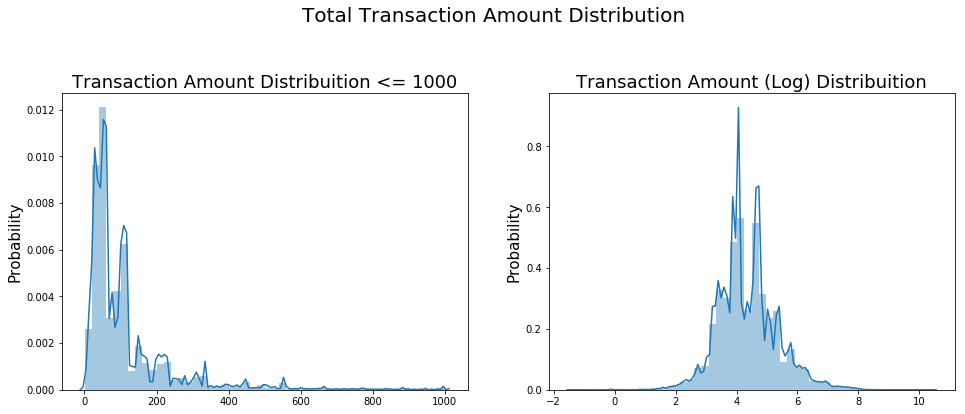

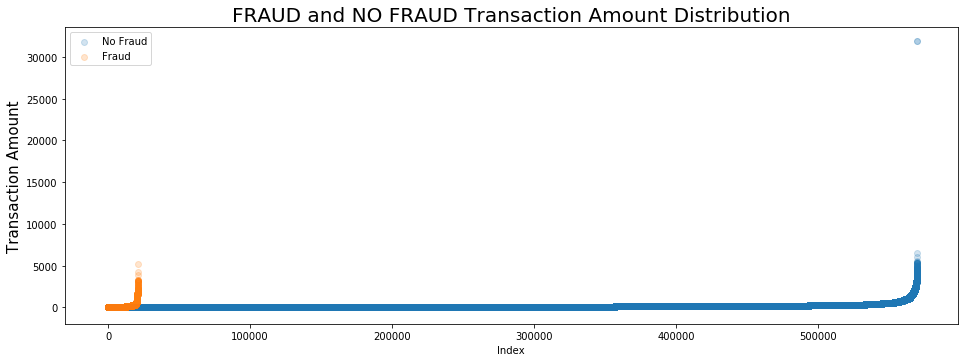

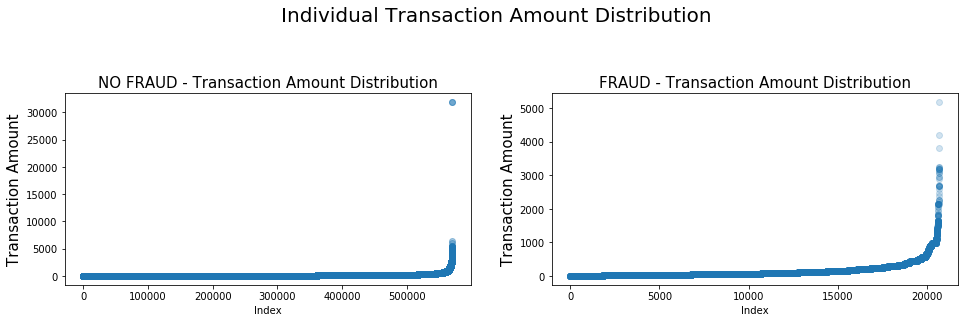

In [272]:
# First Figure
plt.figure(figsize=(16, 12))
plt.suptitle("Total Transaction Amount Distribution", fontsize=20)

plt.subplot(221)
ax1 = sns.distplot(train_transaction_df[train_transaction_df['TransactionAmt'] <= 1000]['TransactionAmt'])
ax1.set_title("Transaction Amount Distribuition <= 1000", fontsize=18)
ax1.set_xlabel("")
ax1.set_ylabel("Probability", fontsize=15)

plt.subplot(222)
ax2 = sns.distplot(np.log(train_transaction_df['TransactionAmt']))
ax2.set_title("Transaction Amount (Log) Distribuition", fontsize=18)
ax2.set_xlabel("")
ax2.set_ylabel("Probability", fontsize=15)

# 2nd Figure
plt.figure(figsize=(16,12))

plt.subplot(211)
no_fraud_transaction_list = range(train_transaction_df[train_transaction_df['isFraud'] == 0].shape[0])
no_fraud_transaction_amt = np.sort(train_transaction_df[train_transaction_df['isFraud'] == 0]['TransactionAmt'].values)
fraud_transaction_list = range(train_transaction_df[train_transaction_df['isFraud'] == 1].shape[0])
fraud_transaction_amt = np.sort(train_transaction_df[train_transaction_df['isFraud'] == 1]['TransactionAmt'].values)

ax3 = plt.scatter(no_fraud_transaction_list, no_fraud_transaction_amt, label='No Fraud', alpha=.2)
ax3 = plt.scatter(fraud_transaction_list, fraud_transaction_amt, label='Fraud', alpha=.2)
ax3 = plt.title("FRAUD and NO FRAUD Transaction Amount Distribution", fontsize=20)
ax3 = plt.xlabel("Index")
ax3 = plt.ylabel("Transaction Amount", fontsize=15)
ax3 = plt.legend()

# 3rd Figure
plt.figure(figsize=(16, 12))

plt.suptitle("Individual Transaction Amount Distribution", fontsize=20)

plt.subplot(321)
ax4 = plt.scatter(no_fraud_transaction_list, no_fraud_transaction_amt, label='No Fraud', alpha=.4)
ax4 = plt.title("NO FRAUD - Transaction Amount Distribution", fontsize=15)
ax4 = plt.xlabel("Index")
ax4 = plt.ylabel("Transaction Amount", fontsize=15)

plt.subplot(322)
ax5 = plt.scatter(fraud_transaction_list, fraud_transaction_amt, label='Fraud', alpha=.2)
ax5 = plt.title("FRAUD - Transaction Amount Distribution", fontsize=15)
ax5 = plt.xlabel("Index")
ax5 = plt.ylabel("Transaction Amount", fontsize=15)

plt.show()

## Quantiles of Fraud and No Fraud Transactions

In [273]:
fraud_transaction_quantile = train_transaction_df[train_transaction_df['isFraud'] == 1]['TransactionAmt'] \
                             .quantile([.01, .025, .1, .25, .5, .75, .9, .975, .99]).reset_index()

no_fraud_transaction_quantile = train_transaction_df[train_transaction_df['isFraud'] == 0]['TransactionAmt'] \
                             .quantile([.01, .025, .1, .25, .5, .75, .9, .975, .99]).reset_index()

transaction_quantile_df = pd.concat([fraud_transaction_quantile, no_fraud_transaction_quantile],
                                    axis=1, keys=['Fraud', 'No Fraud'])

In [274]:
transaction_quantile_df

Fraud                No Fraud               
   index TransactionAmt    index TransactionAmt
0  0.010       6.739453    0.010       9.511875
1  0.025       9.510156    0.025      15.000000
2  0.100      18.937500    0.100      26.312500
3  0.250      35.031250    0.250      43.968750
4  0.500      75.000000    0.500      68.500000
5  0.750     161.000000    0.750     120.000000
6  0.900     335.000000    0.900     267.100000
7  0.975     884.000000    0.975     645.000000
8  0.990     994.000000    0.990    1104.000000

## Transaction Amount Outliers
- considering outlier values that are highest than 3 times the std from the mean

In [275]:
def calculate_outliers(df_col):
    
    # calculate mean and std of the array
    data_mean, data_std = np.mean(df_col), np.std(df_col)
    
    # seting the cut line to both higher and lower values (outliers)
    cut = data_std * 3
    
    # Calculating the higher and lower cut values
    lower, upper = data_mean - cut, data_mean + cut 
    
    # creating an array of lower, higher and total outlier values
    lower_outliers = [val for val in df_col if val < lower]
    upper_outliers = [val for val in df_col if val > upper]
    total_outliers = lower_outliers + upper_outliers
    
    # array without outlier values
    removed_outliers = [val for val in df_col if val > lower and val < upper]
    
    print('Identified lower outliers: %d' % len(lower_outliers))
    print('Identified upper outliers: %d' % len(upper_outliers))
    print('Total outlier observations: %d' % len(total_outliers))
    print('Non-outlier observations: %d' % len(removed_outliers))
    print('Total percentage of outliers: %.4f' % round((len(total_outliers) / len(df_col)) * 100, 4))
    
    return

In [276]:
calculate_outliers(train_transaction_df['TransactionAmt'])

Identified lower outliers: 0
Identified upper outliers: 10097
Total outlier observations: 10097
Non-outlier observations: 580443
Total percentage of outliers: 1.7098


## Product Feature

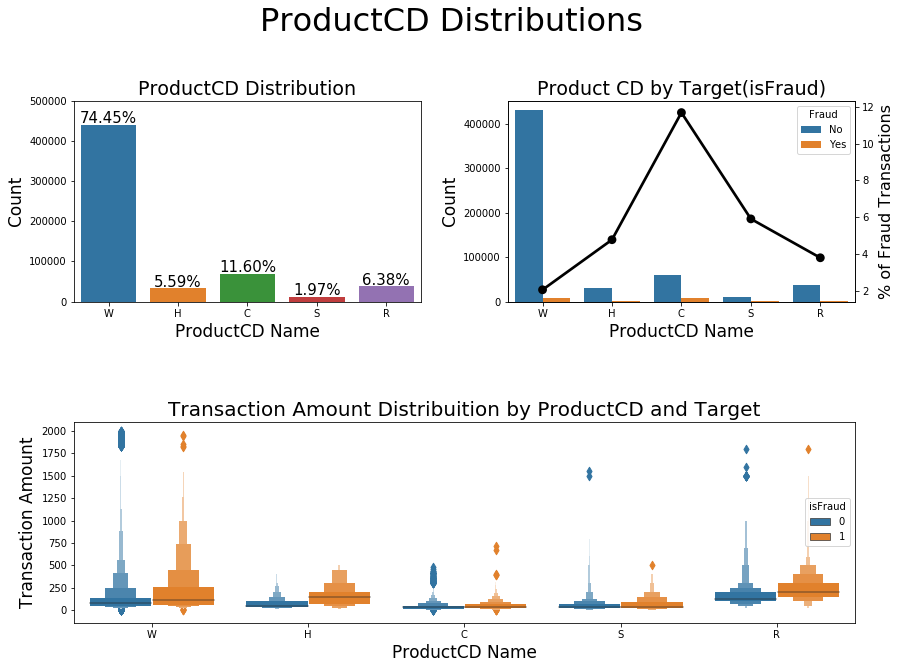

In [277]:
product_target_df = pd.crosstab(train_transaction_df['ProductCD'], 
                                train_transaction_df['isFraud'], 
                                normalize='index') * 100
product_target_df = product_target_df.reset_index()
product_target_df = product_target_df.rename(columns = {0: 'No Fraud', 1: 'Fraud'})

total = len(train_transaction_df)

plt.figure(figsize=(14, 10))
plt.suptitle('ProductCD Distributions', fontsize=32)

plt.subplot(221)
ax1 = sns.countplot(x='ProductCD', data=train_transaction_df)
ax1.set_title('ProductCD Distribution', fontsize=19)
ax1.set_xlabel('ProductCD Name', fontsize=17)
ax1.set_ylabel('Count', fontsize=17)
ax1.set_ylim(0,500000)

h_lst = [p.get_height() for p in ax1.patches]
pad = max(h_lst) * 0.01

for p in ax1.patches:
    height = p.get_height()
    if np.isnan(height):
        continue
    ax1.text(p.get_x() + p.get_width() / 2.0,
             height + pad,
             '{:1.2f}%'.format(height / total * 100),
             ha="center", fontsize=15)
    
plt.subplot(222)
ax2 = sns.countplot(x='ProductCD', hue='isFraud', data=train_transaction_df)
plt.legend(title='Fraud', loc='best', labels=['No', 'Yes'])

ax2_twin = ax2.twinx()
ax2_twin = sns.pointplot(x='ProductCD', y='Fraud', 
                         data=product_target_df, 
                         color='black', 
                         order=['W', 'H', 'C', 'S', 'R'],
                         legend=False)
ax2_twin.set_ylabel('% of Fraud Transactions', fontsize=16)

ax2.set_title('Product CD by Target(isFraud)', fontsize=19)
ax2.set_xlabel('ProductCD Name', fontsize=17)
ax2.set_ylabel('Count', fontsize=17)

plt.subplot(212)
ax3 = sns.boxenplot(x='ProductCD', y='TransactionAmt', hue='isFraud', 
                    data=train_transaction_df[train_transaction_df['TransactionAmt'] < 2000])
ax3.set_title('Transaction Amount Distribuition by ProductCD and Target', fontsize=20)
ax3.set_xlabel('ProductCD Name', fontsize=17)
ax3.set_ylabel('Transaction Amount', fontsize=17)

plt.subplots_adjust(hspace=0.6, wspace=0.25, top=0.85)

plt.show()

- W, C and R are the most frequent values. 
- Note that in W, H and R the distribution of Fraud values are slightly higher than the Non-Fraud Transactions

# Card Features

- What's the different in transactions and % of Fraud for each values in these features
- _**Card features**_ has 6 columns, and 4 of them seems to be numericals, so lets see the quantiles and distributions

In [278]:
# summary of Card Features
card_summary = summary_table(train_transaction_df[['card1', 'card2', 'card3', 'card4', 'card5', 'card6']])
card_summary

,Name,dtypes,Missing %,Unique
1,card2,float16,1.512683,500
4,card5,float16,0.721204,119
3,card4,object,0.267044,4
5,card6,object,0.266028,4
2,card3,float16,0.265012,114
0,card1,int16,0.000000,13553


## Card Numericals Feature Quantiles

In [279]:
print("Card Features Quantiles: ")
print(train_transaction_df[['card1', 'card2', 'card3', 'card5']].quantile([0.01, .025, .1, .25, .5, .75, .975, .99]))

Card Features Quantiles: 
         card1  card2  card3  card5
0.010   1338.0  100.0  144.0  102.0
0.025   1675.0  111.0  150.0  102.0
0.100   2803.0  111.0  150.0  126.0
0.250   6019.0  214.0  150.0  166.0
0.500   9678.0  361.0  150.0  226.0
0.750  14184.0  512.0  150.0  226.0
0.975  18018.0  583.0  185.0  226.0
0.990  18238.0  583.0  185.0  226.0


_Card 1_ and _Card 2_ has a large distribution of values, so maybe it will be better to get the log of these columns to make the distribution range small.

- Replace all the card (card3, card5) categories which appear less than 200 by _**Others**_ category.

In [280]:
card3_low_frequency_categories = train_transaction_df.card3.value_counts()[train_transaction_df.card3.value_counts() < 200]

card5_low_frequency_categories = train_transaction_df.card5.value_counts()[train_transaction_df.card5.value_counts() < 300]

print('Card3 categories with low frequency: ', len(card3_low_frequency_categories))
print('Card5 categories with low frequency: ', len(card5_low_frequency_categories))

Card3 categories with low frequency:  100
Card5 categories with low frequency:  92


In [281]:
# update card3
train_transaction_df.loc[train_transaction_df.card3.isin(card3_low_frequency_categories.index), 
                         'card3'] = 'Others'
# update card5
train_transaction_df.loc[train_transaction_df.card5.isin(card5_low_frequency_categories.index), 
                         'card5'] = 'Others'

## Visualizing Card 1, Card 2, Card3 and Card 5 Distributions

- Card 1 and 2 are numericals, plot the distribution of them.
- In Card 3 and Card5, as we have many values(category) with low frequencies, set those values to "Others"

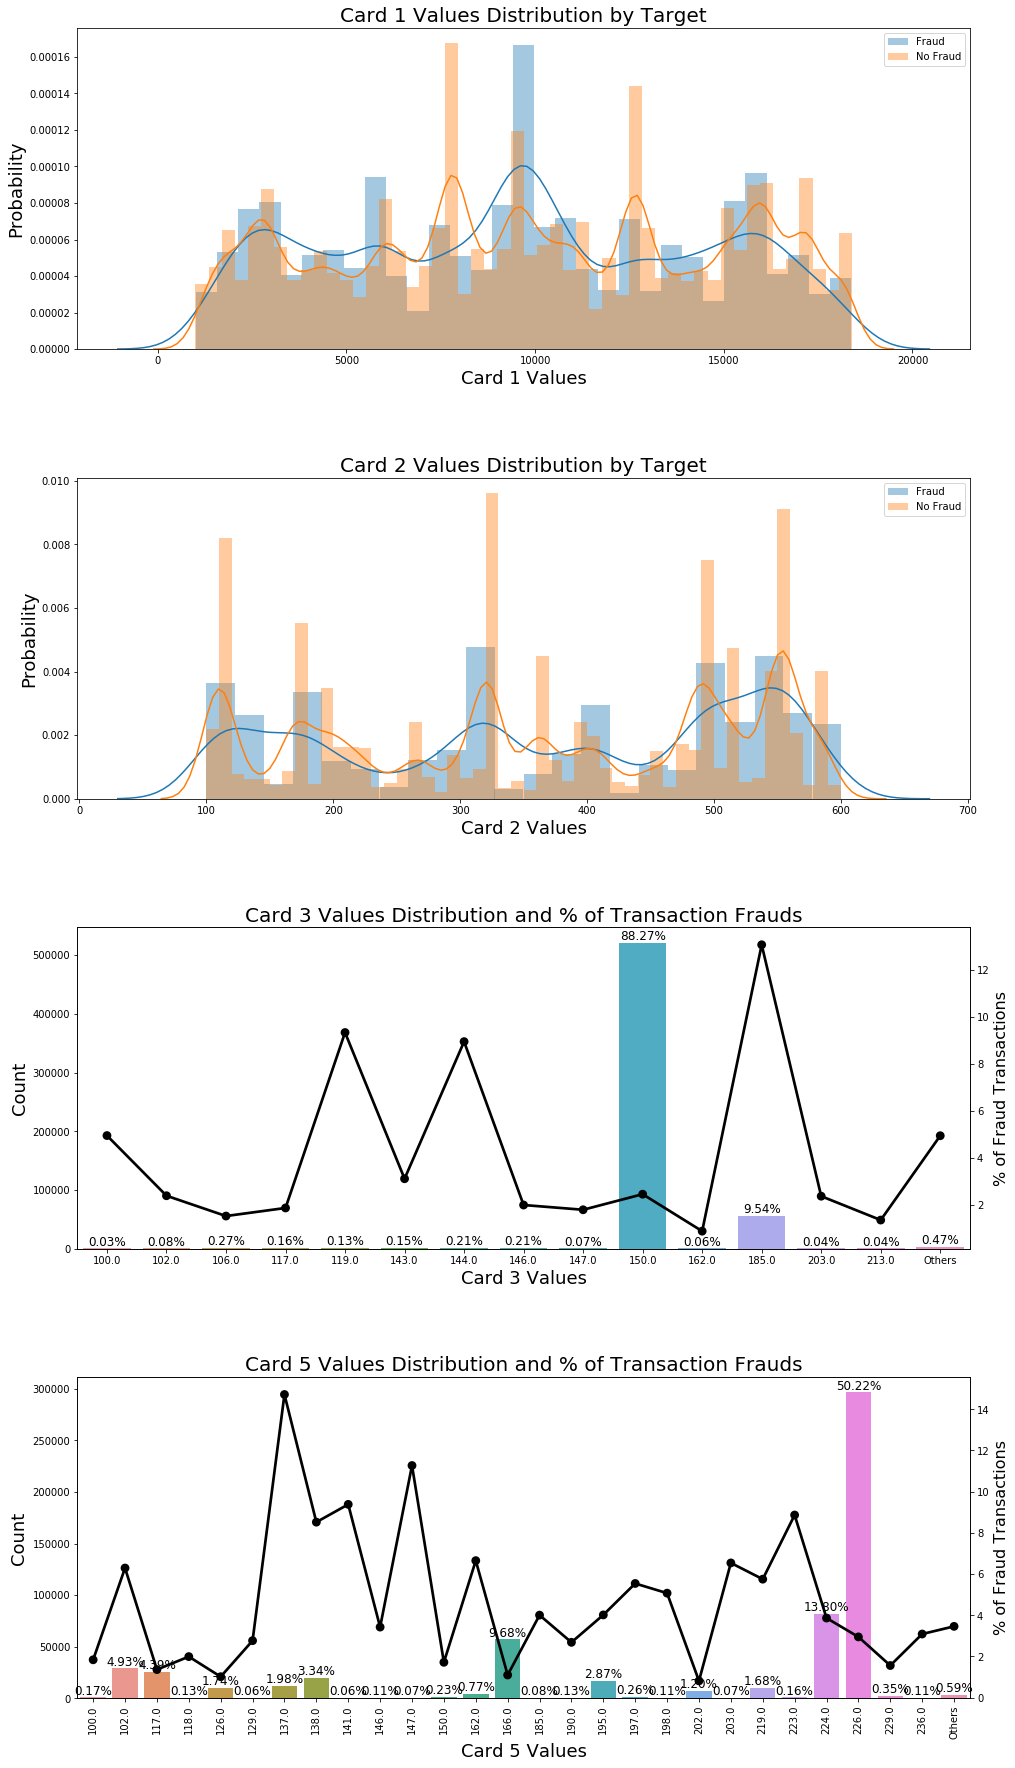

In [282]:
card3_target_df = pd.crosstab(train_transaction_df['card3'], train_transaction_df['isFraud'], normalize='index') * 100
card3_target_df = card3_target_df.reset_index()
card3_target_df.rename(columns={0: 'No Fraud', 1: 'Fraud'}, inplace=True)

card5_target_df = pd.crosstab(train_transaction_df['card5'], train_transaction_df['isFraud'], normalize='index') * 100
card5_target_df = card5_target_df.reset_index()
card5_target_df.rename(columns={0: 'No Fraud', 1: 'Fraud'}, inplace=True)

total = len(train_transaction_df)

plt.figure(figsize=(16,32))

plt.subplot(411)
ax1 = sns.distplot(train_transaction_df[train_transaction_df['isFraud'] == 1]['card1'], label='Fraud')
ax1 = sns.distplot(train_transaction_df[train_transaction_df['isFraud'] == 0]['card1'], label='No Fraud')
ax1.legend()
ax1.set_title('Card 1 Values Distribution by Target', fontsize=20)
ax1.set_xlabel('Card 1 Values', fontsize=18)
ax1.set_ylabel('Probability', fontsize=18)

plt.subplot(412)
ax2 = sns.distplot(train_transaction_df[train_transaction_df['isFraud'] == 1]['card2'].dropna(), label='Fraud')
ax2 = sns.distplot(train_transaction_df[train_transaction_df['isFraud'] == 0]['card2'].dropna(), label='No Fraud')
ax2.legend()
ax2.set_title('Card 2 Values Distribution by Target', fontsize=20)
ax2.set_xlabel('Card 2 Values', fontsize=18)
ax2.set_ylabel('Probability', fontsize=18)

plt.subplot(413)
ax3 = sns.countplot(x='card3', data=train_transaction_df, order=list(card3_target_df.card3.values))

ax3_twin = ax3.twinx()
ax3_twin = sns.pointplot(x='card3', y='Fraud', data=card3_target_df,
                         color='black', order=list(card3_target_df.card3.values))
ax3_twin.set_ylabel('% of Fraud Transactions', fontsize=16)

ax3.set_title('Card 3 Values Distribution and % of Transaction Frauds', fontsize=20)
ax3.set_xlabel('Card 3 Values', fontsize=18)
ax3.set_ylabel('Count', fontsize=18)

h_lst = [p.get_height() for p in ax3.patches]
pad = max(h_lst) * 0.01

for p in ax3.patches:
    height = p.get_height()
    if np.isnan(height):
        continue
    ax3.text(p.get_x() + p.get_width() / 2.0,
             height + pad,
             '{:1.2f}%'.format(height / total * 100),
             ha="center", fontsize=12)
    
plt.subplot(414)
ax4 = sns.countplot(x='card5', data=train_transaction_df, order=list(card5_target_df.card5.values))

ax4_twin = ax4.twinx()
ax4_twin = sns.pointplot(x='card5', y='Fraud', data=card5_target_df,
                         color='black', order=list(card5_target_df.card5.values))
ax4_twin.set_ylabel('% of Fraud Transactions', fontsize=16)

ax4.set_title('Card 5 Values Distribution and % of Transaction Frauds', fontsize=20)
ax4.set_xlabel('Card 5 Values', fontsize=18)
ax4.set_xticklabels(ax4.get_xticklabels(), rotation=90)
ax4.set_ylabel('Count', fontsize=18)

h_lst = [p.get_height() for p in ax4.patches]
pad = max(h_lst) * 0.01

for p in ax4.patches:
    height = p.get_height()
    if np.isnan(height):
        continue
    ax4.text(p.get_x() + p.get_width() / 2.0,
             height + pad,
             '{:1.2f}%'.format(height / total * 100),
             ha="center", fontsize=12)
    
plt.subplots_adjust(hspace = 0.4, top = 0.85)

plt.show()

- In Card3 we can see that _150_ and _185_ are the most common values in the column.
- In card3 the most frequent values are _150 and 185_ that represents _97%_ of data. Also is posible to see _high %_ of frauds in _119, 147, 185_ that has few entries for values.
- In card5 the most frequent values are _226, 224, 166_ that represents _73%_ of data. Also is posible to see _high %_ of frauds in _137, 147, 141_ that has few entries for values.

## Card 4 - Categorical

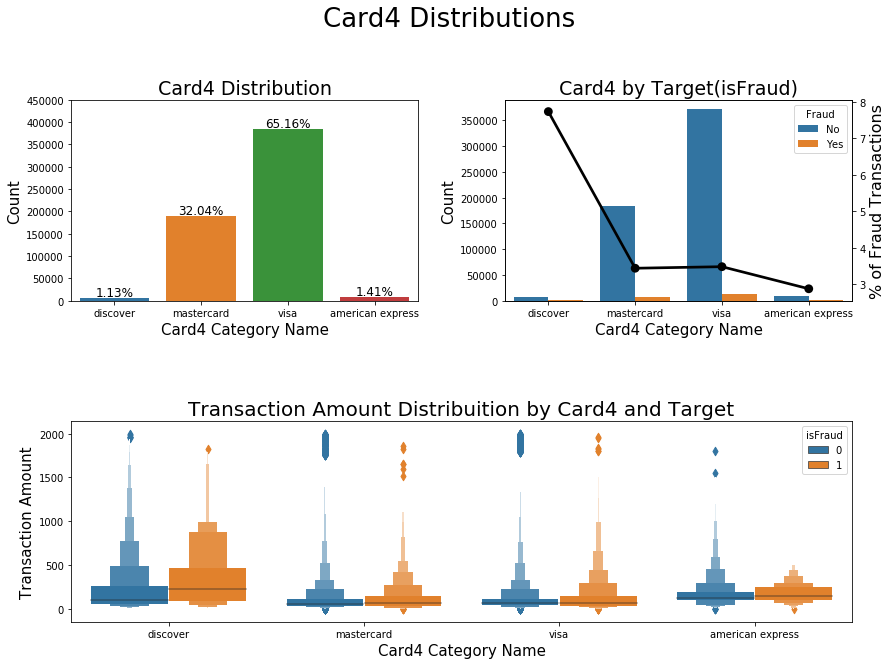

In [283]:
card4_target_df = pd.crosstab(train_transaction_df['card4'], 
                                train_transaction_df['isFraud'], 
                                normalize='index') * 100
card4_target_df = card4_target_df.reset_index()
card4_target_df = card4_target_df.rename(columns = {0: 'No Fraud', 1: 'Fraud'})

total = len(train_transaction_df)

plt.figure(figsize=(14, 10))
plt.suptitle('Card4 Distributions', fontsize=26)

plt.subplot(221)
ax1 = sns.countplot(x='card4', data=train_transaction_df)
ax1.set_title('Card4 Distribution', fontsize=19)
ax1.set_xlabel('Card4 Category Name', fontsize=15)
ax1.set_ylabel('Count', fontsize=15)
ax1.set_ylim(0, 450000)

h_lst = [p.get_height() for p in ax1.patches]
pad = max(h_lst) * 0.01

for p in ax1.patches:
    height = p.get_height()
    if np.isnan(height):
        continue
    ax1.text(p.get_x() + p.get_width() / 2.0,
             height + pad,
             '{:1.2f}%'.format(height / total * 100),
             ha="center", fontsize=12)
    
plt.subplot(222)
ax2 = sns.countplot(x='card4', hue='isFraud', data=train_transaction_df)
plt.legend(title='Fraud', loc='best', labels=['No', 'Yes'])

ax2_twin = ax2.twinx()
ax2_twin = sns.pointplot(x='card4', y='Fraud', 
                         data=card4_target_df, 
                         color='black', 
                         order=['discover', 'mastercard', 'visa', 'american express'],
                         legend=False)
ax2_twin.set_ylabel('% of Fraud Transactions', fontsize=16)

ax2.set_title('Card4 by Target(isFraud)', fontsize=19)
ax2.set_xlabel('Card4 Category Name', fontsize=15)
ax2.set_ylabel('Count', fontsize=15)

plt.subplot(212)
ax3 = sns.boxenplot(x='card4', y='TransactionAmt', hue='isFraud', 
                    data=train_transaction_df[train_transaction_df['TransactionAmt'] < 2000])
ax3.set_title('Transaction Amount Distribuition by Card4 and Target', fontsize=20)
ax3.set_xlabel('Card4 Category Name', fontsize=15)
ax3.set_ylabel('Transaction Amount', fontsize=15)

plt.subplots_adjust(hspace=0.6, wspace=0.25, top=0.85)

plt.show()

- We can see that **_97%_** of our data are in **_Mastercard(32%)_** and **_Visa(65%)_**
- We have a highest percentage of **_Fraud Transactions_** in **_discover(~8%)_** against **_~3.5% of Mastercard_** and **_Visa_** and **_2.87% in American Express_**

## Card 6 - Categorical

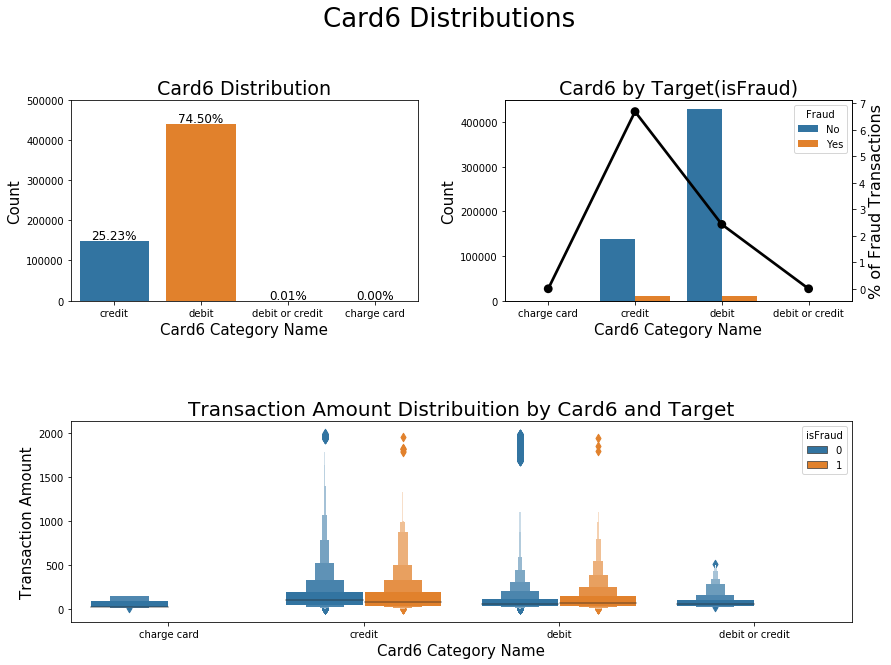

In [284]:
card6_target_df = pd.crosstab(train_transaction_df['card6'], 
                                train_transaction_df['isFraud'], 
                                normalize='index') * 100
card6_target_df = card6_target_df.reset_index()
card6_target_df = card6_target_df.rename(columns = {0: 'No Fraud', 1: 'Fraud'})

total = len(train_transaction_df)

plt.figure(figsize=(14, 10))
plt.suptitle('Card6 Distributions', fontsize=26)

plt.subplot(221)
ax1 = sns.countplot(x='card6', data=train_transaction_df)
ax1.set_title('Card6 Distribution', fontsize=19)
ax1.set_xlabel('Card6 Category Name', fontsize=15)
ax1.set_ylabel('Count', fontsize=15)
ax1.set_ylim(0, 500000)

h_lst = [p.get_height() for p in ax1.patches]
pad = max(h_lst) * 0.01

for p in ax1.patches:
    height = p.get_height()
    if np.isnan(height):
        continue
    ax1.text(p.get_x() + p.get_width() / 2.0,
             height + pad,
             '{:1.2f}%'.format(height / total * 100),
             ha="center", fontsize=12)
    
plt.subplot(222)
ax2 = sns.countplot(x='card6', hue='isFraud', 
                    data=train_transaction_df, 
                    order=list(card6_target_df.card6.values))

plt.legend(title='Fraud', loc='best', labels=['No', 'Yes'])

ax2_twin = ax2.twinx()
ax2_twin = sns.pointplot(x='card6', y='Fraud', 
                         data=card6_target_df, 
                         color='black',
                         order=list(card6_target_df.card6.values),
                         legend=False)
ax2_twin.set_ylabel('% of Fraud Transactions', fontsize=16)

ax2.set_title('Card6 by Target(isFraud)', fontsize=19)
ax2.set_xlabel('Card6 Category Name', fontsize=15)
ax2.set_ylabel('Count', fontsize=15)

plt.subplot(212)
ax3 = sns.boxenplot(x='card6', y='TransactionAmt', hue='isFraud',
                    order=list(card6_target_df.card6.values),
                    data=train_transaction_df[train_transaction_df['TransactionAmt'] < 2000])

ax3.set_title('Transaction Amount Distribuition by Card6 and Target', fontsize=20)
ax3.set_xlabel('Card6 Category Name', fontsize=15)
ax3.set_ylabel('Transaction Amount', fontsize=15)

plt.subplots_adjust(hspace=0.6, wspace=0.25, top=0.85)

plt.show()

- All data is on **Credit** and **Debit**. We can see a high percentage of **Frauds** in Credit than Debit transactions.
- The Distribution of **Transaction Amount** in **Credit** and **Debit** don't shows clear differences.

## Explore M1-M9 Features

In [285]:
for col in ['M1', 'M2', 'M3', 'M4', 'M5', 'M6', 'M7', 'M8', 'M9']:
    train_transaction_df[col] = train_transaction_df[col].fillna('Miss')
    
def plot_dist_ratio(df, col, limit=2000):
    total = len(df)
    total_amt = train_transaction_df['TransactionAmt'].sum()
    
    tmp = pd.crosstab(df[col], df['isFraud'], normalize='index') * 100
    tmp = tmp.reset_index()
    tmp.rename(columns={0: 'No Fraud', 1: 'Fraud'}, inplace=True)
    
    percent_amt = ((train_transaction_df.groupby(['isFraud', col])
                    ['TransactionAmt'].sum() / total_amt) * 100).unstack('isFraud')
    percent_amt = percent_amt.reset_index()
    percent_amt.rename(columns={0: 'No Fraud', 1: 'Fraud'}, inplace=True)
    
    plt.figure(figsize=(20, 5))
    plt.suptitle(f'{col} Distributions', fontsize=22)
    
    # plot 1
    plt.subplot(121)
    ax1 = sns.countplot(x=col, data=df, order=list(tmp[col].values))
    ax1.set_title(f'{col} Distribution\nCount and %Fraud by each category', fontsize=18)
    ax1.set_xlabel(f'{col} Category Name', fontsize=14)
    ax1.set_ylabel('Count', fontsize=14)
    ax1.set_ylim(0, 400000)
    
    # plot fraud transaction and set only y-axis    
    ax1_twin = ax1.twinx()
    ax1_twin = sns.pointplot(x=col, y='Fraud', data=tmp, 
                             order=list(tmp[col].values),
                             color='black', legend=False)
    ax1_twin.set_ylabel('% of Fraud Transactions', fontsize=14)
    ax1_twin.set_ylim(0, 20)
    
    # set percentages for each bar
    h_lst = [p.get_height() for p in ax1.patches]
    pad = max(h_lst) * 0.01
 
    for p in ax1.patches:
        height = p.get_height()
        if np.isnan(height):
            continue
        ax1.text(p.get_x() + p.get_width() / 2.0,
                 height + pad,
                 '{:1.2f}%'.format(height / total * 100),
                 ha="center", fontsize=12)
        
    # plot 2
    plt.subplot(122)
    ax2 = sns.boxplot(x=col, y='TransactionAmt', hue='isFraud', 
                      data=df[df['TransactionAmt'] <= limit], 
                      order=list(tmp[col].values))
    
    ax2.set_title(f'{col} by Transactions dist', fontsize=18)
    ax2.set_xlabel(f'{col} Category Name', fontsize=14)
    ax2.set_ylabel('Transaction Amount (U$)', fontsize=14)
    
    # plot fraud transaction amount and set only y-axis
    ax2_twin = ax2.twinx()
    ax2_twin = sns.pointplot(x=col, y='Fraud', data=percent_amt, 
                             order=list(tmp[col].values),
                             color='black', legend=False)
    ax2_twin.set_ylabel('%Fraud Total Amount', fontsize=14)
    ax2_twin.set_ylim(0, 5)
    
    plt.subplots_adjust(hspace=.4, wspace = 0.35, top = 0.80)
    
    plt.show()

### M distributions: Count, %Fraud and Transaction Amount distribution

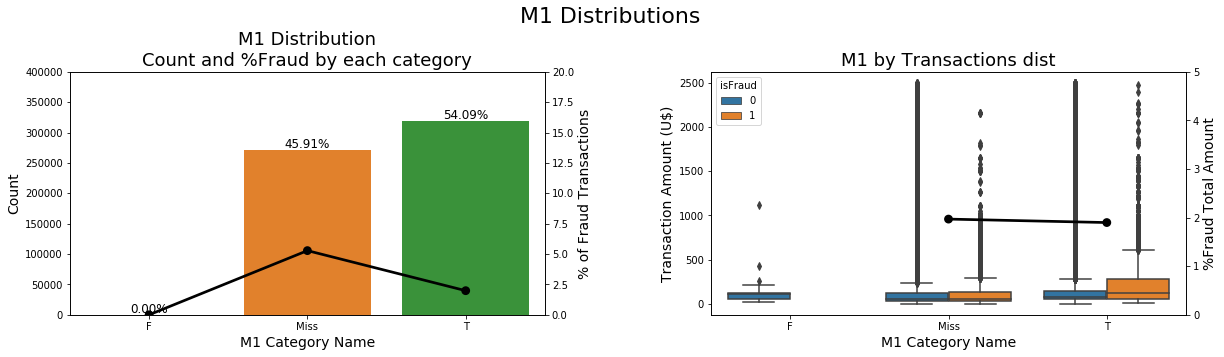

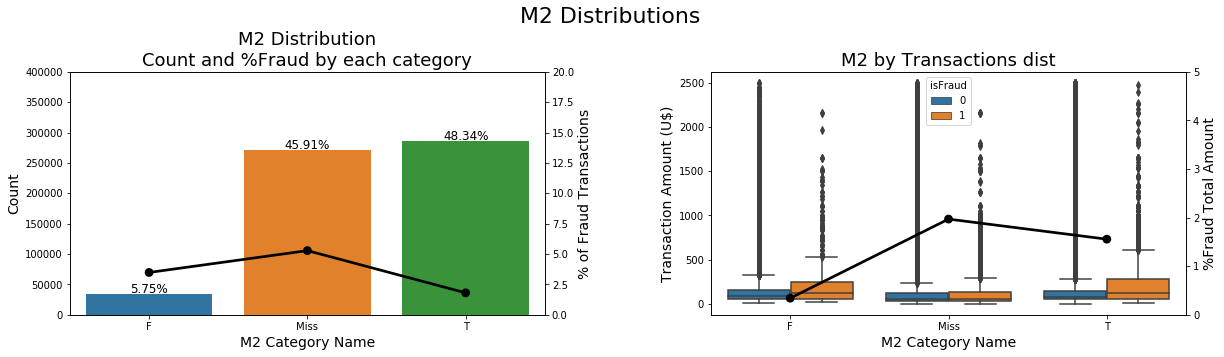

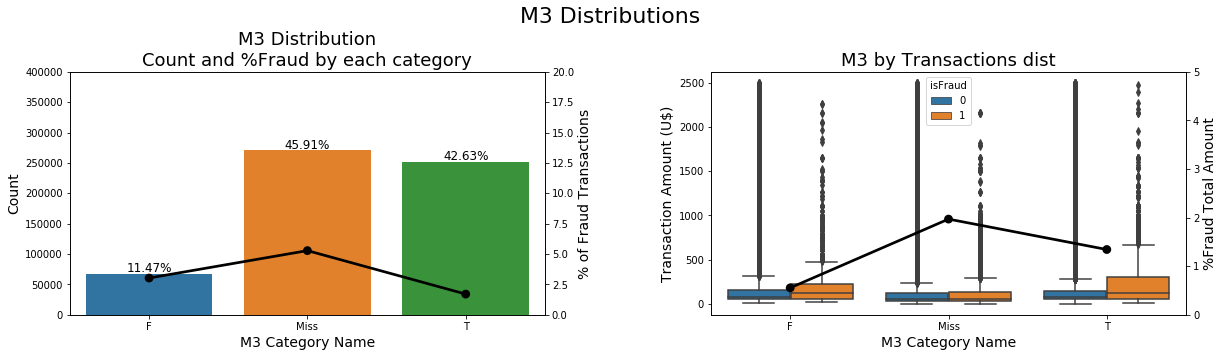

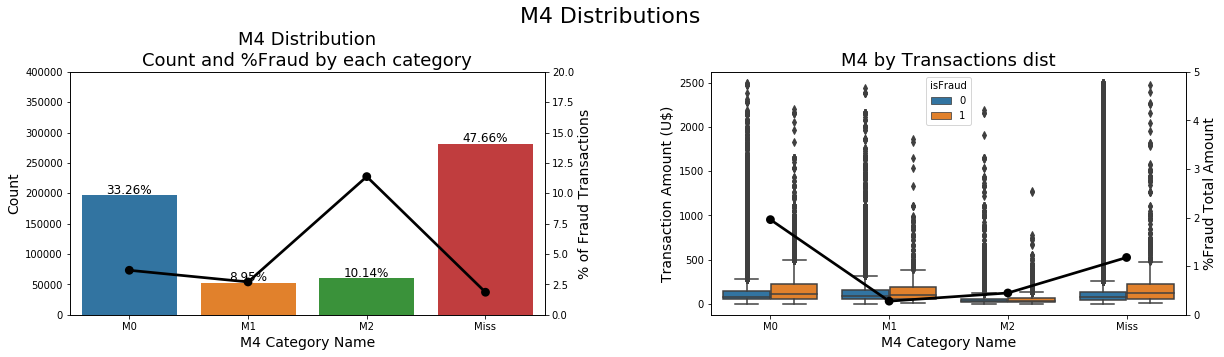

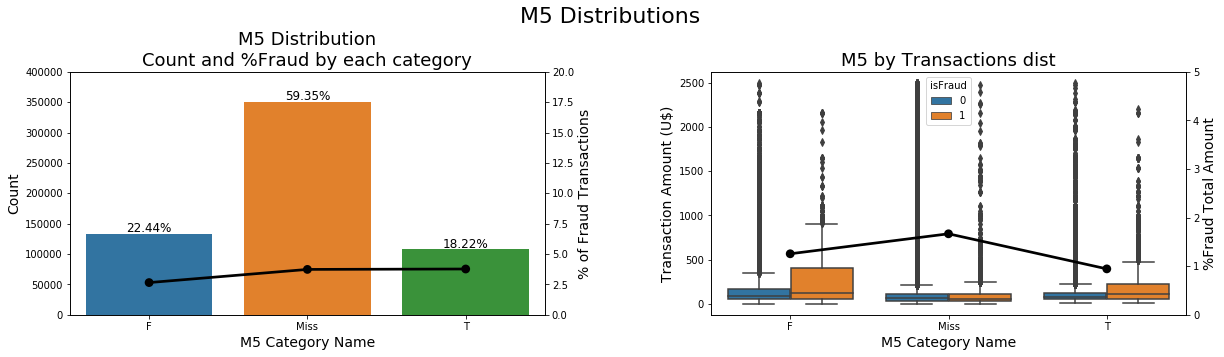

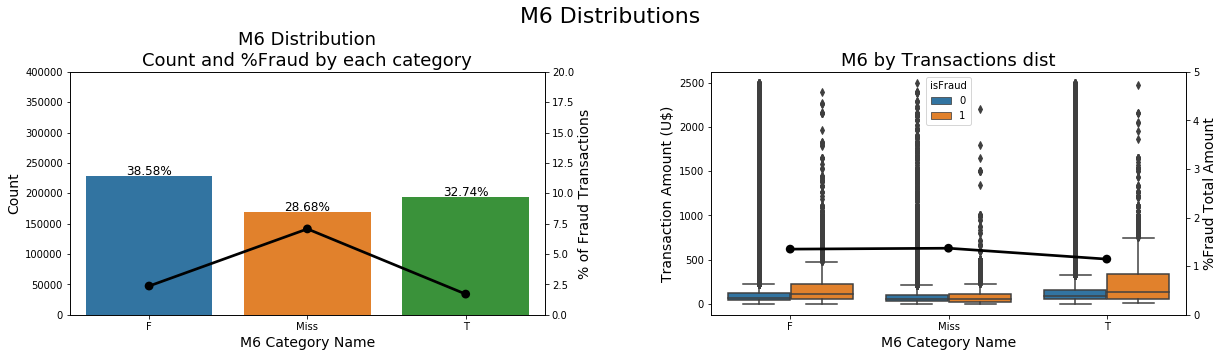

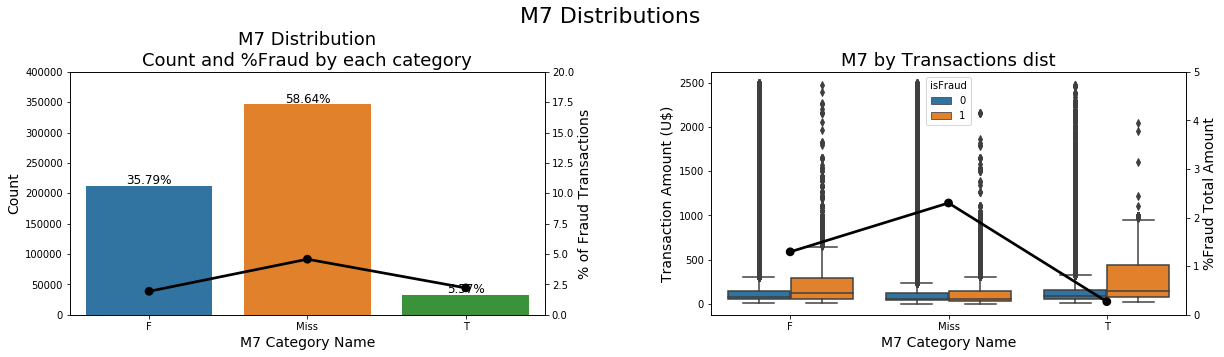

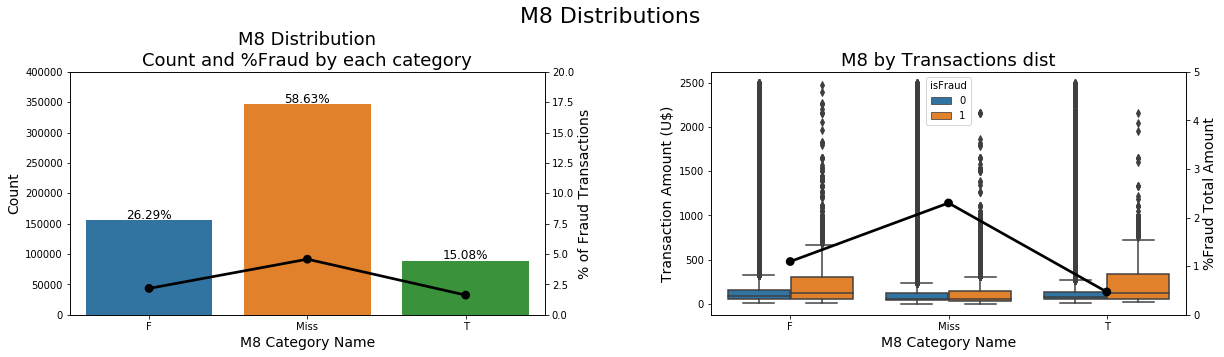

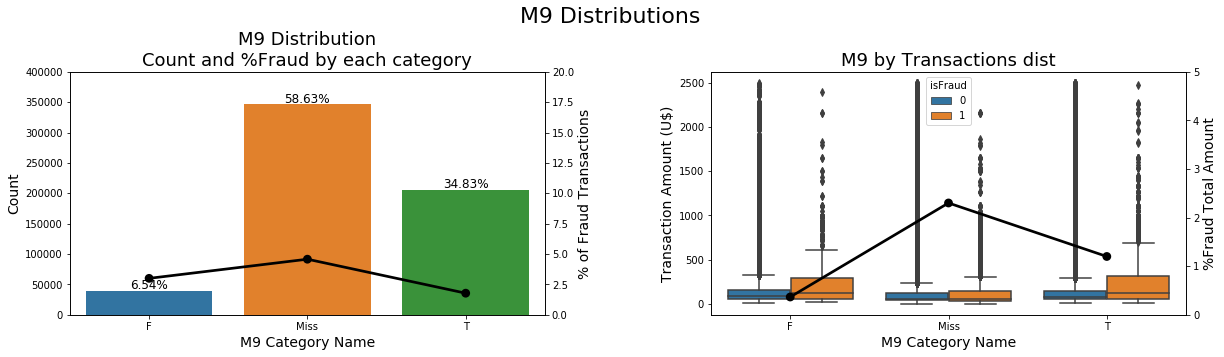

In [286]:
for col in ['M1', 'M2', 'M3', 'M4', 'M5', 'M6', 'M7', 'M8', 'M9']:
    plot_dist_ratio(train_transaction_df, col, limit=2500)

- All the M features have highest percentage(%) of **_Fraud Transaction_** for **_Missing Category_** except **M4**.
- Similarly, all the M features have highest percentage(%) of **_Fraud Transaction Amount_** for **_Missing Category_** except **M4**.

## Addr1 and Addr2

In [287]:
print('Addr Features Quantiles')
train_transaction_df[['addr1', 'addr2']].quantile([0.01, .025, .1, .25, .5, .75, .90,.975, .99])

Addr Features Quantiles


,addr1,addr2
0.010,123.0,87.0
0.025,123.0,87.0
0.100,177.0,87.0
0.250,204.0,87.0
0.500,299.0,87.0
0.750,330.0,87.0
0.900,441.0,87.0
0.975,498.0,87.0
0.990,512.0,87.0


- Set all values in Addr1 that has less than _5000_ entries to "Others"
- Set all values in Addr2 that has less than 50 entries to "Others"

In [288]:
addr1_low_frequency_categories = train_transaction_df.addr1.value_counts()[train_transaction_df.addr1.value_counts() <= 5000]

addr2_low_frequency_categories = train_transaction_df.addr2.value_counts()[train_transaction_df.addr2.value_counts() <= 50]

print('Card3 categories with low frequency: ', len(addr1_low_frequency_categories))
print('Card5 categories with low frequency: ', len(addr2_low_frequency_categories))

Card3 categories with low frequency:  302
Card5 categories with low frequency:  68


In [289]:
# update card3
train_transaction_df.loc[train_transaction_df.addr1.isin(addr1_low_frequency_categories.index), 
                         'addr1'] = 'Others'
# update card5
train_transaction_df.loc[train_transaction_df.addr2.isin(addr2_low_frequency_categories.index), 
                         'addr2'] = 'Others'

In [290]:
def plot_category_count_and_amount_by_fraud_percent(df, col):
    total = len(df)
    total_amt = df['TransactionAmt'].sum()
    
    tmp = pd.crosstab(df[col], df['isFraud'], normalize='index') * 100
    tmp = tmp.reset_index()
    tmp.rename(columns={0: 'No Fraud', 1: 'Fraud'}, inplace=True)
    
    percent_amt = ((df.groupby(['isFraud', col])['TransactionAmt'].sum() / 
                    df.groupby([col])['TransactionAmt'].sum()) * 100).unstack('isFraud')
    
    percent_amt = percent_amt.reset_index()
    percent_amt.rename(columns={0: 'No Fraud', 1: 'Fraud'}, inplace=True)
    percent_amt = percent_amt.fillna(0)
    total_amt_by_category = df.groupby([col])['TransactionAmt'].sum().reset_index()
    
    plt.figure(figsize=(16, 14))
    plt.suptitle(f'{col} Distributions', fontsize=24)
    
    # plot 1
    plt.subplot(211)
    ax1 = sns.countplot(x=col, data=df, order=list(tmp[col].values))
    ax1.set_title(f'{col} Distribution\nCount and %Fraud by each category', fontsize=18)
    ax1.set_xlabel(f'{col} Category Name', fontsize=14)
    ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45)
    ax1.set_ylabel('Count', fontsize=14)
    
    # plot fraud transaction and set only y-axis    
    ax1_twin = ax1.twinx()
    ax1_twin = sns.pointplot(x=col, y='Fraud', data=tmp, 
                             order=list(tmp[col].values),
                             color='black', legend=False)
    ax1_twin.set_ylabel('% of Fraud Transactions', fontsize=14)
    ax1_twin.set_ylim(0, tmp['Fraud'].max() * 1.1)
 
    # set percentages for each bar in graph
    ax1_sizes = []
    
    h_lst = [p.get_height() for p in ax1.patches]
    pad = max(h_lst) * 0.01

    for p in ax1.patches:
        height = p.get_height()
        if np.isnan(height):
            continue
        ax1_sizes.append(height)
        ax1.text(p.get_x() + p.get_width() / 2.0,
                 height + pad,
                 '{:1.2f}%'.format(height / total * 100),
                 ha="center", fontsize=12)
    
    ax1.set_ylim(0, max(ax1_sizes) * 1.15)
    
    # plot 2
    plt.subplot(212)
    ax2 = sns.barplot(x=col, y='TransactionAmt', 
                      data=total_amt_by_category, 
                      order=list(tmp[col].values))
    
    ax2.set_title(f'{col} by Transactions Total + %of total and %Fraud Transactions', fontsize=18)
    ax2.set_xlabel(f'{col} Category Name', fontsize=14)
    ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45)
    ax2.set_ylabel('Transaction Total Amount (U$)', fontsize=14)
    
    # plot fraud transaction amount and set only y-axis
    ax2_twin = ax2.twinx()
    ax2_twin = sns.pointplot(x=col, y='Fraud', data=percent_amt, 
                             order=list(tmp[col].values),
                             color='black', legend=False)
    ax2_twin.set_ylabel('%Fraud Total Amount', fontsize=14)
    ax2_twin.set_ylim(0, percent_amt['Fraud'].max() * 1.1)
    
    # set percentages for each bar in graph
    ax2_sizes = []
    
    h_lst = [p.get_height() for p in ax2.patches]
    pad = max(h_lst) * 0.01
    
    for p in ax2.patches:
        height = p.get_height()
        if np.isnan(height):
            continue
        ax2_sizes.append(height)
        ax2.text(p.get_x() + p.get_width() / 2.0,
                 height + pad,
                 '{:1.2f}%'.format(height / total_amt * 100),
                 ha="center", fontsize=12)
    
    plt.subplots_adjust(hspace=.4, top = 0.9)
    
    plt.show()

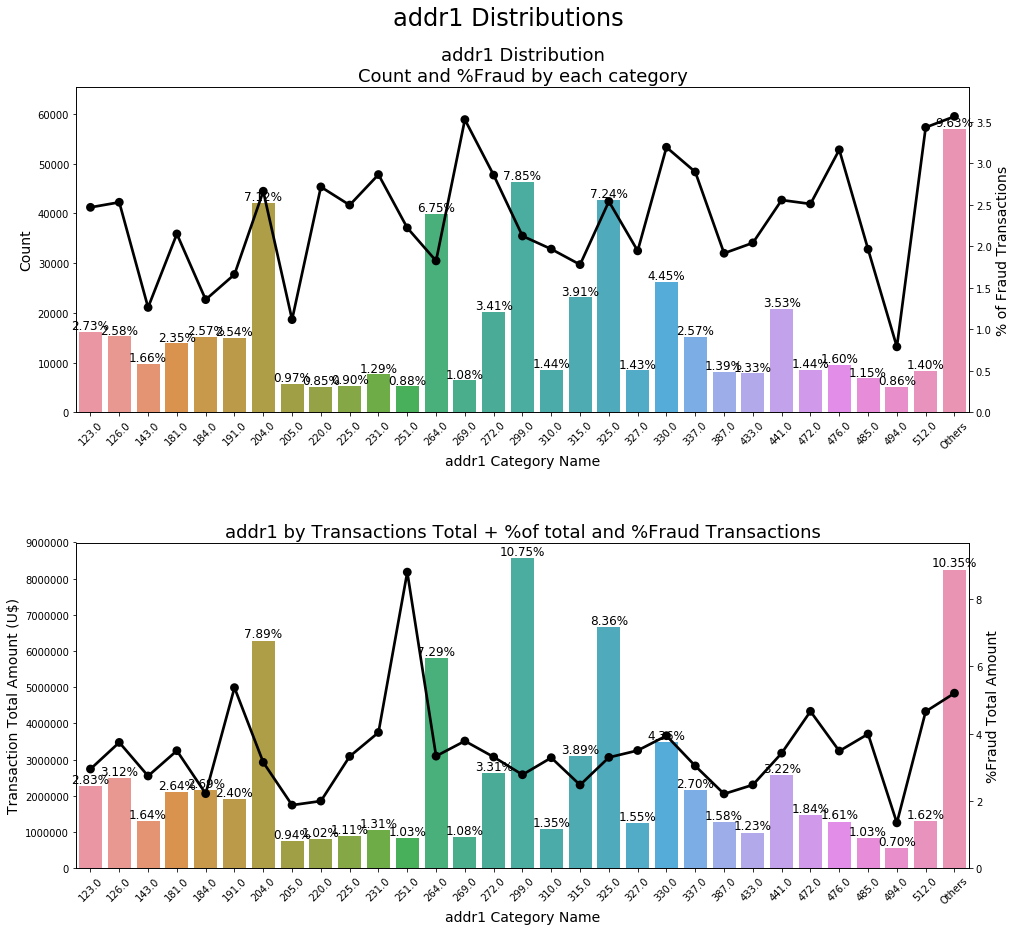

In [291]:
plot_category_count_and_amount_by_fraud_percent(train_transaction_df, 'addr1')

- Most of the transactions and highest percentage of Fraud Transactions are of "Others" category.
- Highest percentage of Total Fraud Transaction Amount are of addr1 "Others" category.
- Above point shows most of the fraud transactions with high transaction amount are from rare addr1 categories.

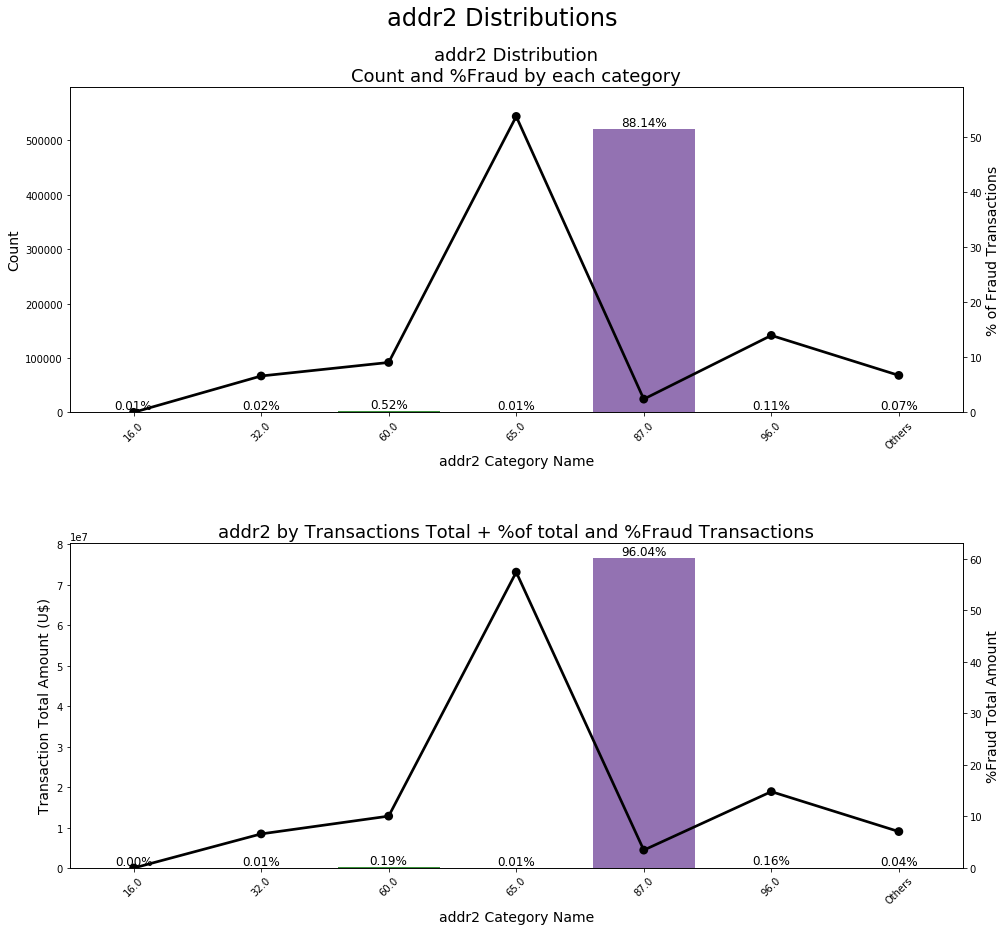

In [292]:
plot_category_count_and_amount_by_fraud_percent(train_transaction_df, 'addr2')

- Value 87 has almost 88% of Total Transaction and 96% of Total Transaction Amount but it has very low percentage of Fraud Transactions and Transaction Amount against the value 65 (0.01%) which has almost 60% Fruad Transactions.

## P emaildomain Distributions

- Group all e-mail domains by the respective enterprises.
- Set all values with less than 500 entries as "Others".

In [293]:
gmail_alias = ['gmail.com', 'gmail']
train_transaction_df.loc[train_transaction_df['P_emaildomain'].isin(gmail_alias), 'P_emaildomain'] = 'Google'

yahoo_alias = ['yahoo.com', 'yahoo.com.mx',  'yahoo.co.uk', 'yahoo.co.jp', 
               'yahoo.de', 'yahoo.fr', 'yahoo.es']

train_transaction_df.loc[train_transaction_df['P_emaildomain'].isin(yahoo_alias), 'P_emaildomain'] = 'Yahoo Mail'

microsoft_alias = ['hotmail.com', 'outlook.com', 'msn.com', 'live.com.mx', 
               'hotmail.es', 'hotmail.co.uk', 'hotmail.de', 'outlook.es', 
               'live.com', 'live.fr', 'hotmail.fr']

train_transaction_df.loc[train_transaction_df['P_emaildomain'].isin(microsoft_alias), 'P_emaildomain'] = 'Microsoft'

email_domains_with_less_than_500_count = train_transaction_df.P_emaildomain.value_counts() \
                                         [train_transaction_df.P_emaildomain.value_counts() <= 500].index

train_transaction_df.loc[train_transaction_df.P_emaildomain.isin(email_domains_with_less_than_500_count), 
                         'P_emaildomain'] = 'Others'

train_transaction_df.P_emaildomain.fillna('NoInf', inplace=True)

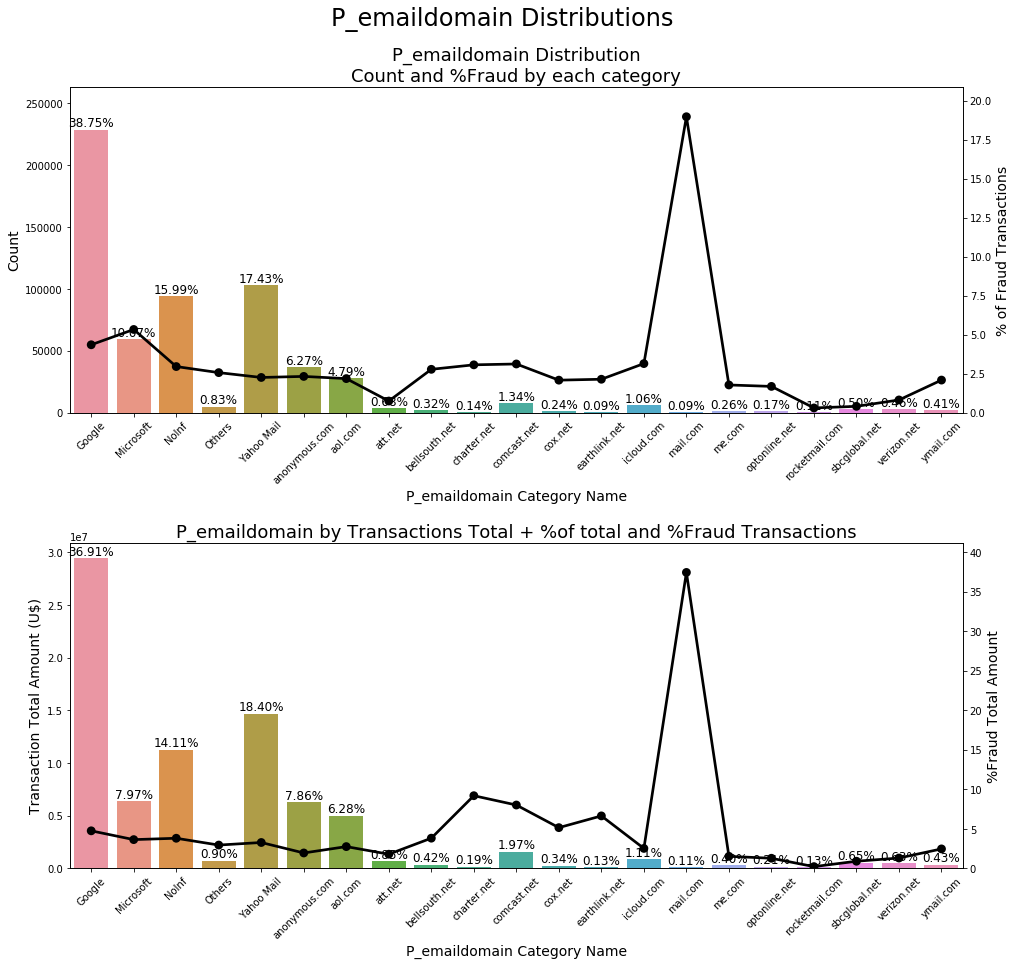

In [294]:
plot_category_count_and_amount_by_fraud_percent(train_transaction_df, 'P_emaildomain')

- Most of the transactions are through gmail as expected.
- Highest percentage of Fraud Transaction count and Amount have been done using mail.com (~20% count) and (~40 amount).

## R emaildomain Distributions

- Group all e-mail domains by the respective enterprises.
- Set all values with less than 300 entries as "Others".

In [295]:
gmail_alias = ['gmail.com', 'gmail']
train_transaction_df.loc[train_transaction_df['R_emaildomain'].isin(gmail_alias), 'R_emaildomain'] = 'Google'

yahoo_alias = ['yahoo.com', 'yahoo.com.mx',  'yahoo.co.uk', 'yahoo.co.jp', 
               'yahoo.de', 'yahoo.fr', 'yahoo.es']

train_transaction_df.loc[train_transaction_df['R_emaildomain'].isin(yahoo_alias), 'R_emaildomain'] = 'Yahoo Mail'

microsoft_alias = ['hotmail.com', 'outlook.com', 'msn.com', 'live.com.mx', 
               'hotmail.es', 'hotmail.co.uk', 'hotmail.de', 'outlook.es', 
               'live.com', 'live.fr', 'hotmail.fr']

train_transaction_df.loc[train_transaction_df['R_emaildomain'].isin(microsoft_alias), 'R_emaildomain'] = 'Microsoft'

email_domains_with_less_than_300_count = train_transaction_df.R_emaildomain.value_counts() \
                                         [train_transaction_df.R_emaildomain.value_counts() <= 300].index

train_transaction_df.loc[train_transaction_df.R_emaildomain.isin(email_domains_with_less_than_300_count), 
                         'R_emaildomain'] = 'Others'

train_transaction_df.R_emaildomain.fillna('NoInf', inplace=True)

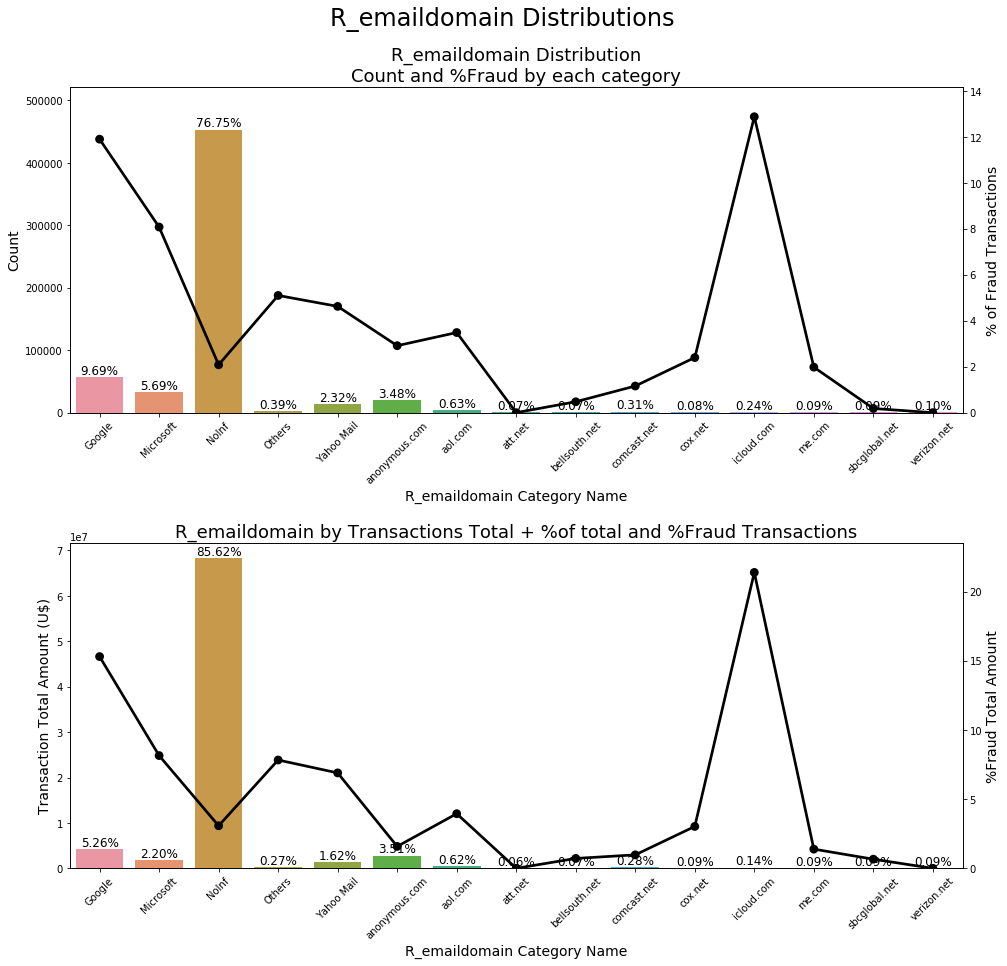

In [296]:
plot_category_count_and_amount_by_fraud_percent(train_transaction_df, 'R_emaildomain')

- Most Fraud Transactions are from _icloud.com_ and _Google_.

## C1-C14 Features

- First, try to understand what this feature is?
- What's the distribution of this feature?

In [297]:
summary_table(train_transaction_df[['C1', 'C2', 'C3', 'C4', 'C5', 'C6','C7',
                                   'C8', 'C9', 'C10', 'C11', 'C12', 'C13', 'C14']])

,Name,dtypes,Missing %,Unique
0,C1,float16,0.0,1495
1,C2,float16,0.0,1167
2,C3,float16,0.0,27
3,C4,float16,0.0,1223
4,C5,float16,0.0,319
5,C6,float16,0.0,1291
6,C7,float16,0.0,1069
7,C8,float16,0.0,1130
8,C9,float16,0.0,205
9,C10,float16,0.0,1122


- There is no missing value in any C feature. (Interesting ?)
- All the features are numeric but C3, C5 and C9 have very few unique values against other C features.

## C Feature Distributions

In [298]:
train_transaction_df.loc[train_transaction_df.C1.isin(train_transaction_df.C1 \
                              .value_counts()[train_transaction_df.C1.value_counts() <= 400 ] \
                              .index), 'C1'] = "Others"

train_transaction_df.loc[train_transaction_df.C2.isin(train_transaction_df.C2 \
                              .value_counts()[train_transaction_df.C2.value_counts() <= 350 ] \
                              .index), 'C2'] = "Others"

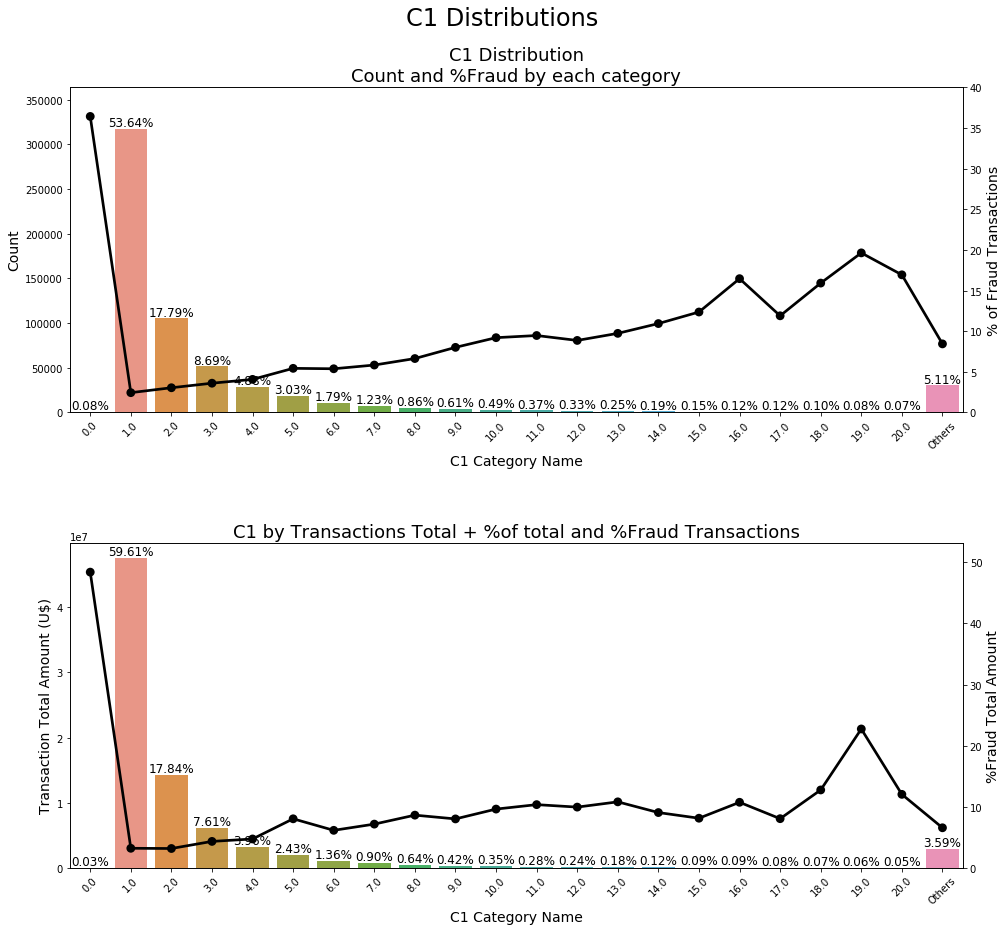

In [299]:
plot_category_count_and_amount_by_fraud_percent(train_transaction_df, 'C1')

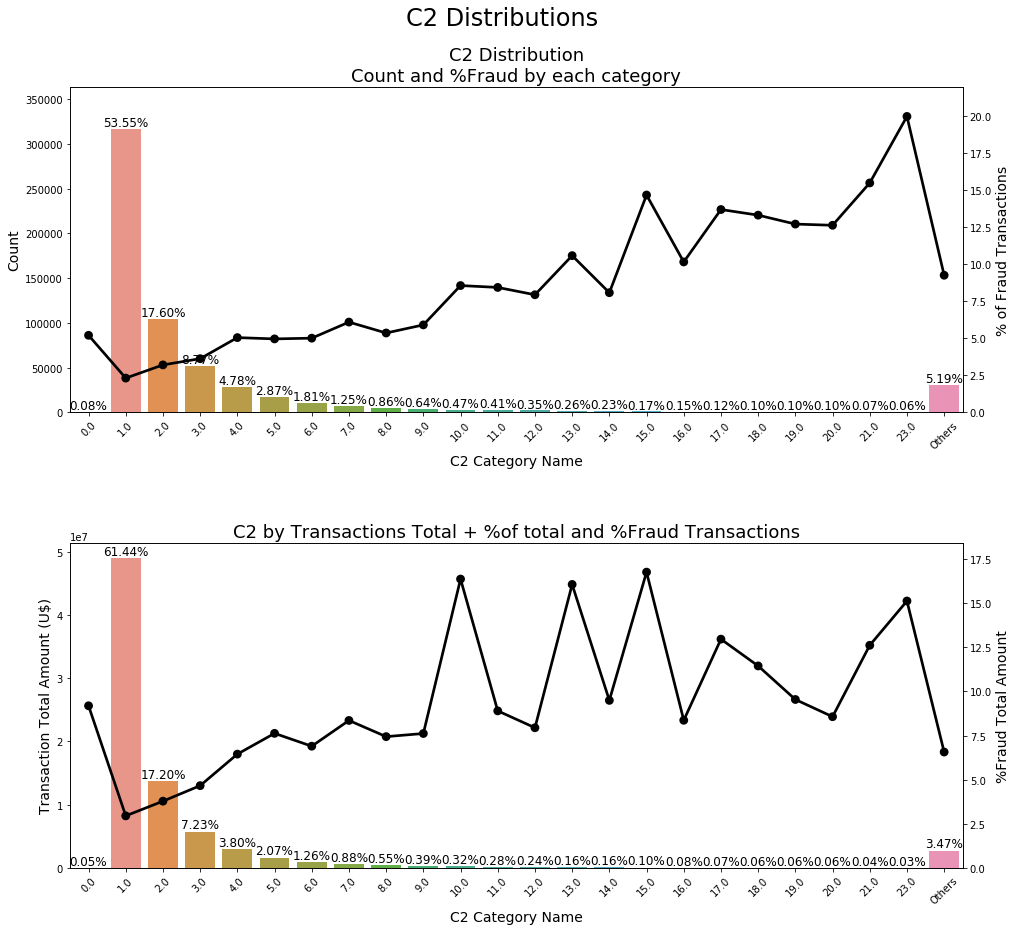

In [300]:
plot_category_count_and_amount_by_fraud_percent(train_transaction_df, 'C2')

We can see the distribution of all C features in the same way!

## TimeDelta Feature

- Let's see if the frauds have some specific hour that has highest % of frauds

- We will assume that **_TransactionDT_** feature is in second. Given a second where a specific transaction occurs. To convert this feature into DateTime feauture, we will assume a **_start date (2017-12-01)_** here and use the delta time to compute datetime features.

In [301]:
from datetime import datetime, timedelta

START_DATE = '2017-01-12'
start_date = datetime.strptime(START_DATE, "%Y-%m-%d")
train_transaction_df['Date'] = train_transaction_df['TransactionDT'] \
                                .apply(lambda x: start_date + timedelta(seconds=x))
    
train_transaction_df['Weekdays'] = train_transaction_df['Date'].dt.dayofweek
train_transaction_df['Hours'] = train_transaction_df['Date'].dt.hour
train_transaction_df['Days'] = train_transaction_df['Date'].dt.day

## Month Days Distribution

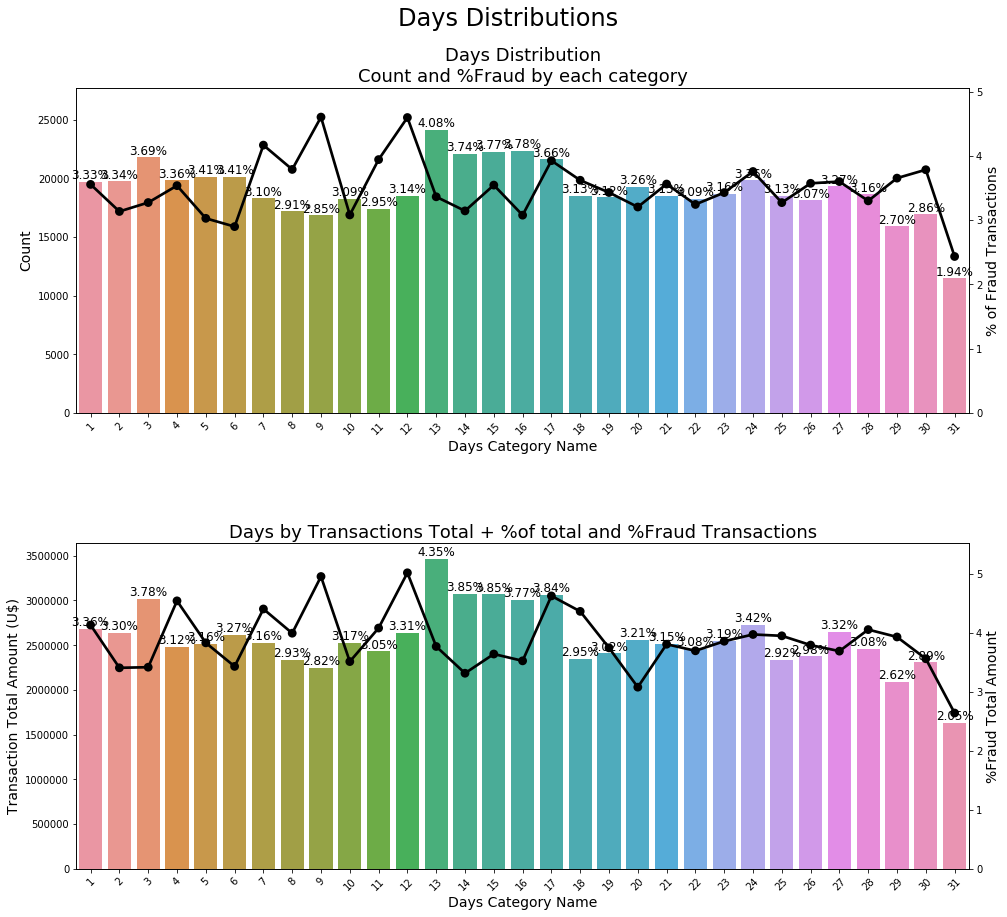

In [302]:
plot_category_count_and_amount_by_fraud_percent(train_transaction_df, 'Days')

- Transactions in first five days of Month(17%) are more than last five days of Month(13.5%)
- Most of the Fraud Transactions are also in the start of Month (Interesting).

## WeekDays Distribution

- Day of the week with Monday=0, Sunday=6.

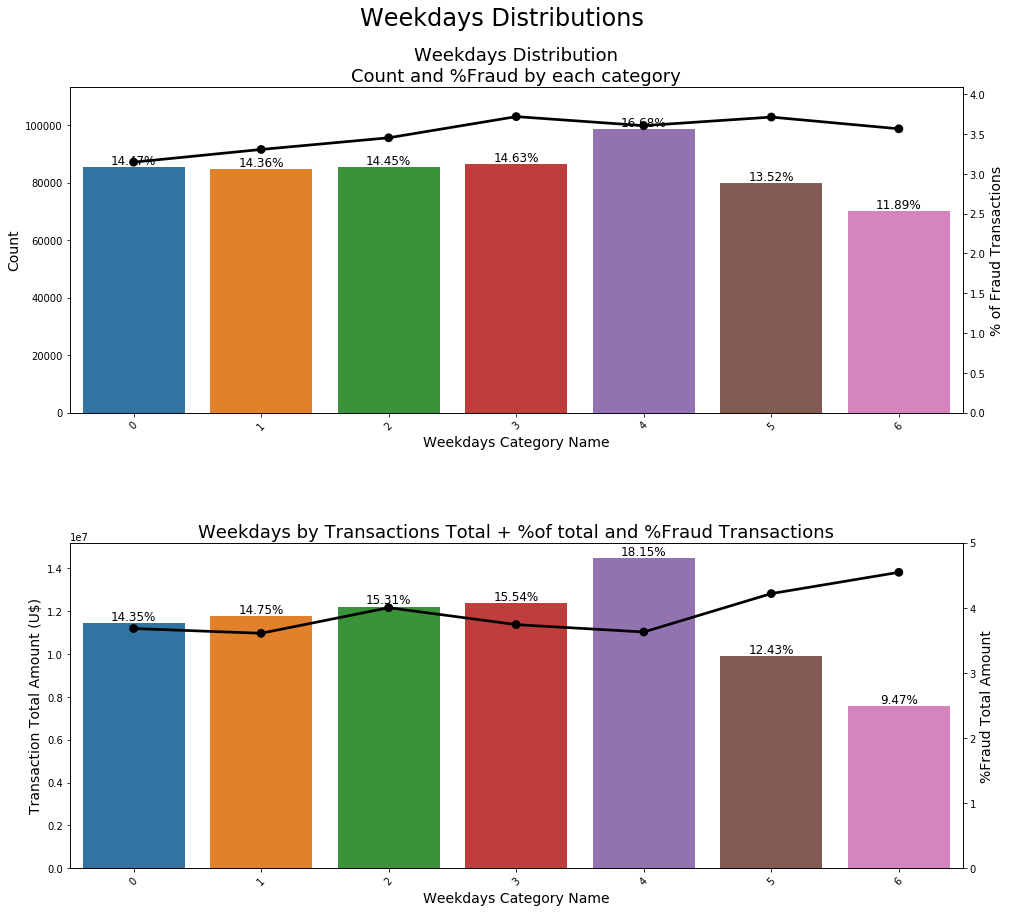

In [303]:
plot_category_count_and_amount_by_fraud_percent(train_transaction_df, 'Weekdays')

- We don't have the reference of date but we can see that two days has lower transactions, that we can infer it is weekend days.
- People do most of their Transactions on Friday.
- Most of the Fraudulent Transactions are on Sunday(rare day) when No. of Transaction are very less as compare to other days.

## Hours Distribution

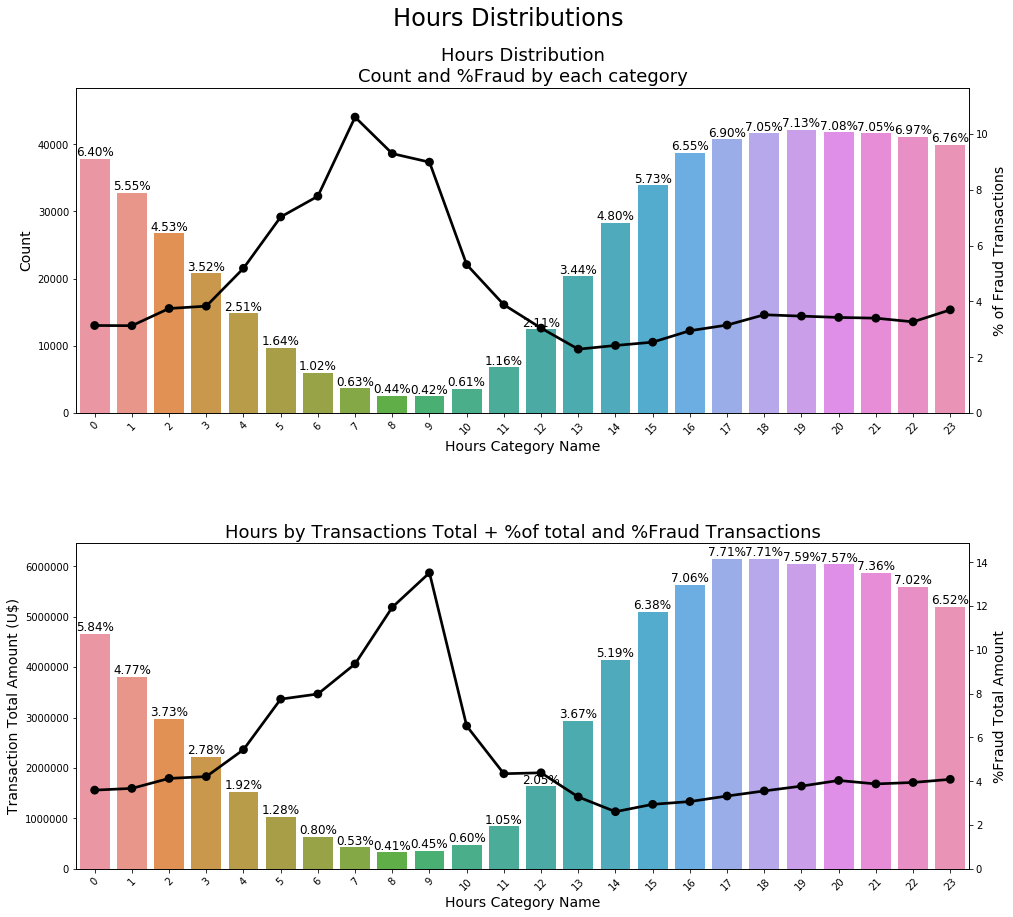

In [304]:
plot_category_count_and_amount_by_fraud_percent(train_transaction_df, 'Hours')

## Total Transactions and Total Amount by each day

In [305]:
#seting some static color options
color_op = ['#021dff', '#DE7A22']

total_transactions_by_date = train_transaction_df.groupby(train_transaction_df.Date.dt.date) \
                             ['TransactionID'].count().reset_index()

total_transactions_by_date.rename(columns={'TransactionID': 'TotalTransactions'}, inplace=True)

total_transaction_amount_by_date = train_transaction_df.groupby(train_transaction_df.Date.dt.date) \
                                   ['TransactionAmt'].sum().reset_index()

total_transaction_amount_by_date.rename(columns={'TransactionAmt': 'TotalAmount'}, inplace=True)

trace1 = go.Scatter(x=total_transactions_by_date['Date'], y=total_transactions_by_date['TotalTransactions'],
                    opacity=0.8, line=dict(color=color_op[0]), name='Total Transactions')

trace2 = go.Scatter(x=total_transaction_amount_by_date['Date'], y=total_transaction_amount_by_date['TotalAmount'],
                    opacity=0.8, line=dict(color=color_op[1]), name='Total Amount', yaxis='y2')

# creating the layout that will allow us to give an title and 
# give us some interesting options to handle with the outputs of graphs
layout = dict(
    title = 'Total Transactions and Amount Informations by Date',
    xaxis = dict(
        rangeselector = dict(
            buttons = list([
                dict(count=1, label='1m', step='month', stepmode='backward'),
                dict(count=3, label='3m', step='month', stepmode='backward'),
                dict(count=6, label='6m', step='month', stepmode='backward'),
                dict(step='all'),
            ])
        ),
        rangeslider = dict(visible=True),
        type = 'date'
    ),
    yaxis = dict(title = 'Total Transactions'),
    yaxis2 = dict(overlaying='y', anchor='x',
                  side='right', zeroline=False,
                  showgrid=False,
                  title='Total Transactions Amount')
)

# creating figure with the both traces and layout
fig = dict(data= [trace1, trace2,], layout=layout)

# rendering the graphs ==> it's an equivalent to plt.show()
iplot(fig)

## FRAUD TRANSACTIONS BY DATE

In [306]:
#seting some static color options
color_op = ['#021dff', '#DE7A22']

total_transactions_by_date_and_target = train_transaction_df.groupby([train_transaction_df.Date.dt.date, 'isFraud']) \
                                         ['TransactionID'].count().reset_index()

total_transactions_by_date_and_target.rename(columns={'TransactionID': 'TotalTransactions'}, inplace=True)

total_fraud_transaction_amount_by_date = train_transaction_df.groupby([train_transaction_df.Date.dt.date, 'isFraud']) \
                                   ['TransactionAmt'].sum().reset_index()

total_fraud_transaction_amount_by_date.rename(columns={'TransactionAmt': 'TotalAmount'}, inplace=True)

# select only Fraud Transactions
total_transactions_by_date_and_target = total_transactions_by_date_and_target \
                                        [total_transactions_by_date_and_target['isFraud'] == 1]

total_fraud_transaction_amount_by_date = total_fraud_transaction_amount_by_date \
                                        [total_fraud_transaction_amount_by_date['isFraud'] == 1]

trace1 = go.Scatter(x=total_transactions_by_date_and_target['Date'], 
                    y=total_transactions_by_date_and_target['TotalTransactions'],
                    opacity=0.8, line=dict(color=color_op[0]), name='Total Fraud Transactions')

trace2 = go.Scatter(x=total_fraud_transaction_amount_by_date['Date'], 
                    y=total_fraud_transaction_amount_by_date['TotalAmount'],
                    opacity=0.8, line=dict(color=color_op[1]), name='Total Fraud Amount', yaxis='y2')

# creating the layout that will allow us to give an title and 
# give us some interesting options to handle with the outputs of graphs
layout = dict(
    title = 'Total Fraud Transactions and Amount Information by Date',
    xaxis = dict(
        rangeselector = dict(
            buttons = list([
                dict(count=1, label='1m', step='month', stepmode='backward'),
                dict(count=3, label='3m', step='month', stepmode='backward'),
                dict(count=6, label='6m', step='month', stepmode='backward'),
                dict(step='all'),
            ])
        ),
        rangeslider = dict(visible=True),
        type = 'date'
    ),
    yaxis = dict(title = 'Total Fraud Transactions'),
    yaxis2 = dict(overlaying='y', anchor='x',
                  side='right', zeroline=False,
                  showgrid=False,
                  title='Total Fraud Transactions Amount')
)

# creating figure with the both traces and layout
fig = dict(data= [trace1, trace2,], layout=layout)

# rendering the graphs ==> it's an equivalent to plt.show()
iplot(fig)

- **_Time Series feature_** showing a good pattern with Fraud Transactions so it could be a very good feature. Since, we assume first date(starting date) by ourselves so we can't conclude any specific Fraud pattern by any **_Month, WeekDay, Date or Hour_**.

## EDA for Transaction Identity Dataset

- First, we will see which are categorical features in this dataset and then we will explore those features.

In [307]:
identity_categorical_features = train_identity_df.select_dtypes(include='object').columns.values
print('Identity Dataset Categorical Features: \n\n', identity_categorical_features)

Identity Dataset Categorical Features: 

 ['id_12' 'id_15' 'id_16' 'id_23' 'id_27' 'id_28' 'id_29' 'id_30' 'id_31'
 'id_33' 'id_34' 'id_35' 'id_36' 'id_37' 'id_38' 'DeviceType' 'DeviceInfo']


In [308]:
identity_categorical_summary = summary_table(train_identity_df[identity_categorical_features])
identity_categorical_summary

,Name,dtypes,Missing %,Unique
3,id_23,object,96.416215,3
4,id_27,object,96.416215,2
9,id_33,object,49.187079,260
7,id_30,object,46.222432,75
10,id_34,object,46.056034,4
16,DeviceInfo,object,17.726179,1786
2,id_16,object,10.325654,2
8,id_31,object,2.739318,130
15,DeviceType,object,2.373243,2
6,id_29,object,2.256765,2


In [309]:
train_df = train_transaction_df.merge(train_identity_df, how='left', on='TransactionID')

## Plot ID Columns with few unique values

In [310]:
def plot_categorical_features(df, col):
    tmp = pd.crosstab(df[col], df['isFraud'], normalize='index') * 100
    tmp = tmp.reset_index()
    tmp.rename(columns = {0: 'No Fraud', 1: 'Fraud'}, inplace=True)

    total = len(train_transaction_df)

    plt.figure(figsize=(14, 10))
    plt.suptitle(f'{col} Distributions', fontsize=24)

    # plot 1
    plt.subplot(221)
    ax1 = sns.countplot(x=col, data=df)
    ax1.set_title(f'{col} Distribution', fontsize=19)
    ax1.set_xlabel(f'{col} Category Name', fontsize=15)
    ax1.set_ylabel('Count', fontsize=15)

    h_lst = [p.get_height() for p in ax1.patches]
    pad = max(h_lst) * 0.01

    ax1_sizes = []
    for p in ax1.patches:
        height = p.get_height()
        if np.isnan(height):
            continue
        ax1_sizes.append(height)
        ax1.text(p.get_x() + p.get_width() / 2.0,
                 height + pad,
                 '{:1.2f}%'.format(height / total * 100),
                 ha="center", fontsize=12)
        
    ax1.set_ylim(0, max(ax1_sizes) * 1.15)

    # plot 2
    plt.subplot(222)
    ax2 = sns.countplot(x=col, hue='isFraud', 
                        data=df, 
                        order=list(tmp[col].values))

    plt.legend(title='Fraud', loc='best', labels=['No', 'Yes'])

    ax2_twin = ax2.twinx()
    ax2_twin = sns.pointplot(x=col, y='Fraud', 
                             data=tmp, 
                             color='black',
                             order=list(tmp[col].values),
                             legend=False)
    ax2_twin.set_ylabel('% of Fraud Transactions', fontsize=16)

    ax2.set_title(f'{col} by Target(isFraud)', fontsize=19)
    ax2.set_xlabel(f'{col} Category Name', fontsize=15)
    ax2.set_ylabel('Count', fontsize=15)

    # plot 3
    plt.subplot(212)
    ax3 = sns.boxenplot(x=col, y='TransactionAmt', hue='isFraud',
                        order=list(tmp[col].values),
                        data=df[df['TransactionAmt'] <= 2000])
    
    ax3.set_title(f'Transaction Amount Distribuition by {col.capitalize()} and Target', fontsize=20)
    ax3.set_xlabel(f'{col.capitalize()} Category Name', fontsize=15)
    ax3.set_ylabel('Transaction Amount', fontsize=15)

    plt.subplots_adjust(hspace=0.6, wspace=0.25, top=0.85)

    plt.show()

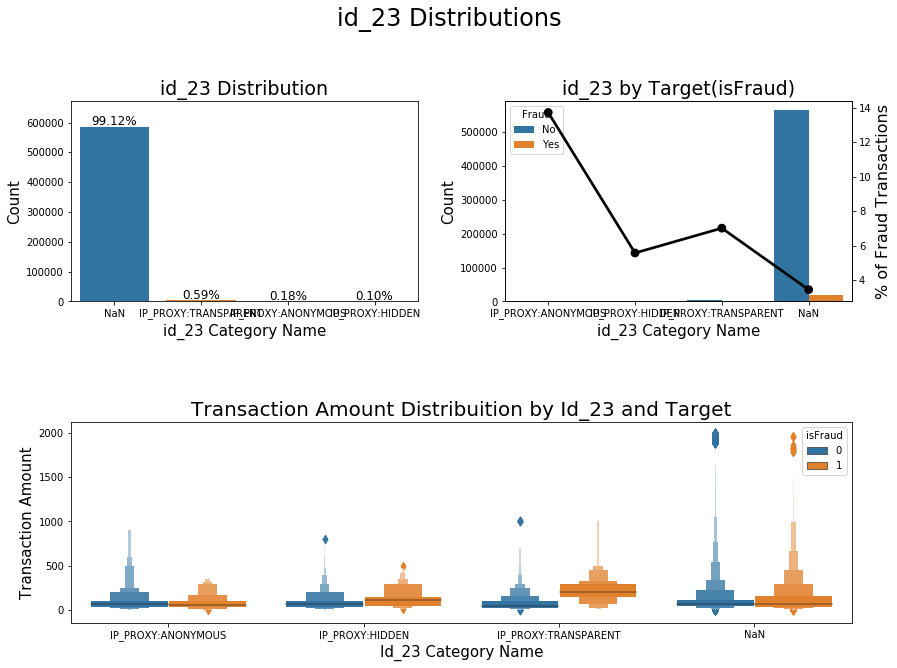

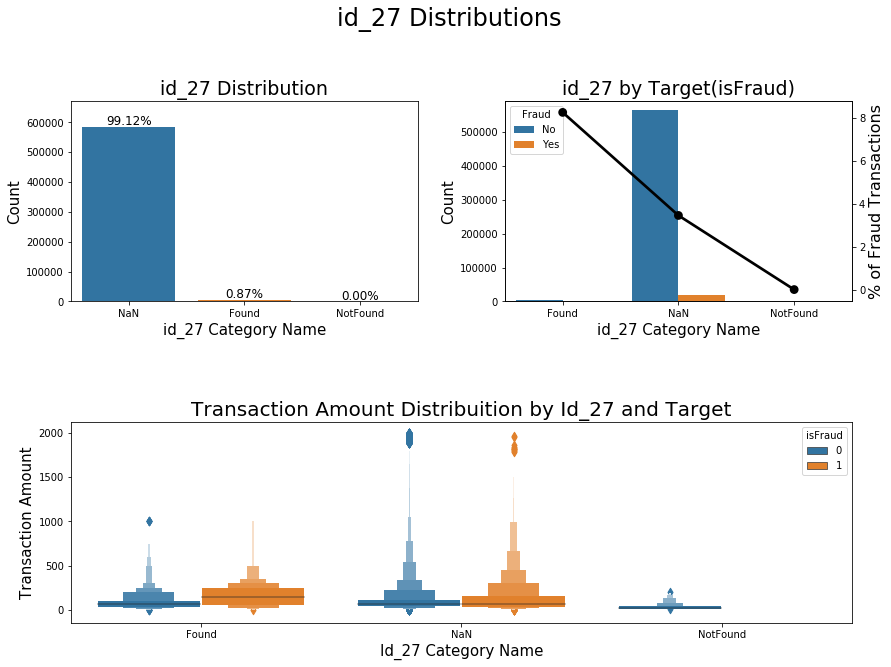

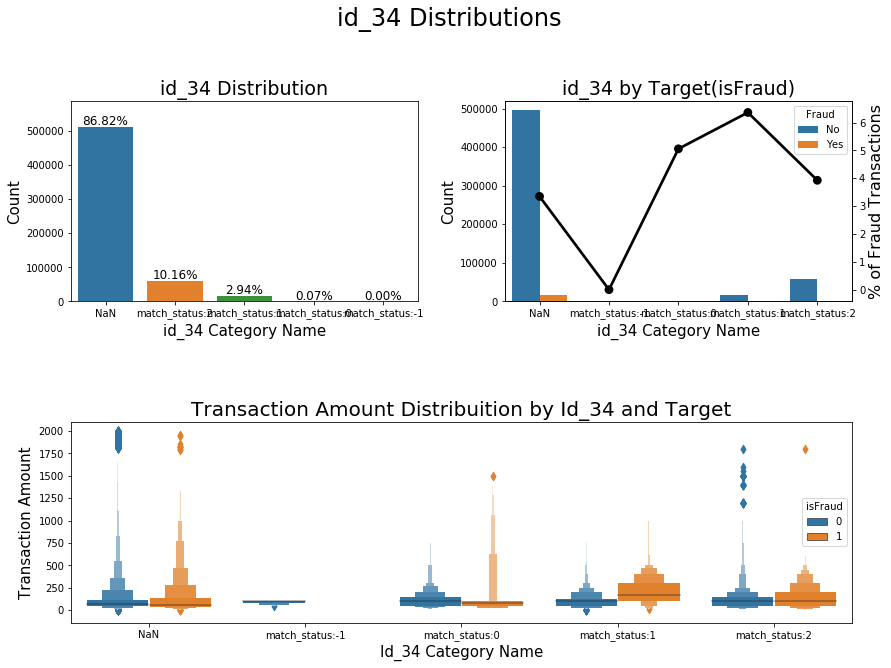

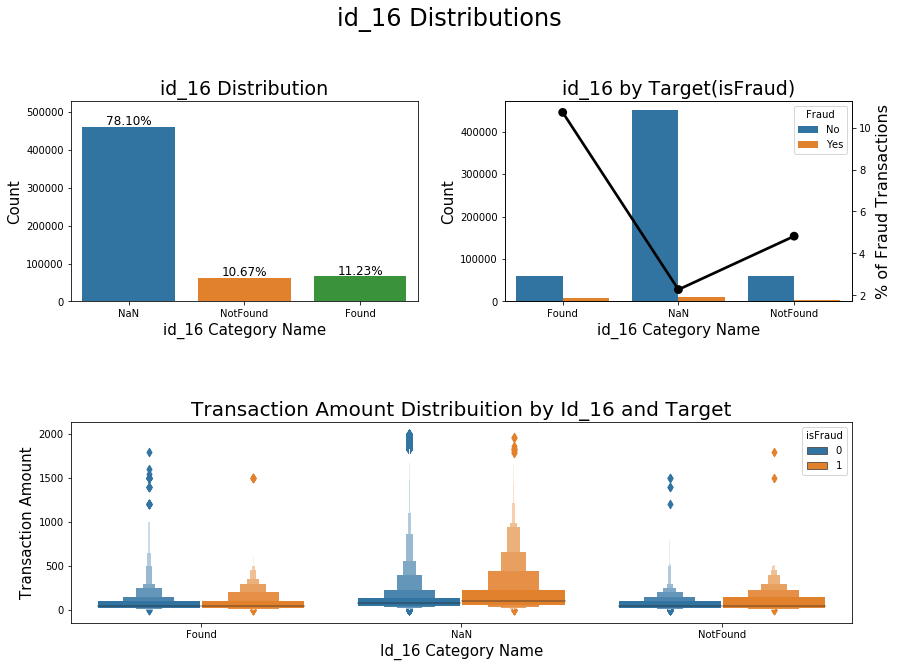

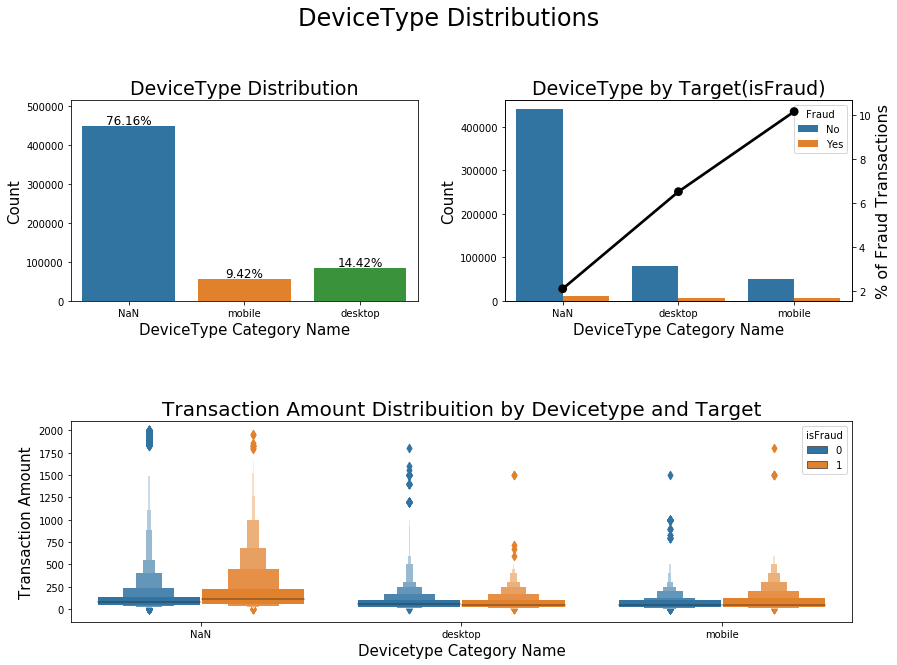

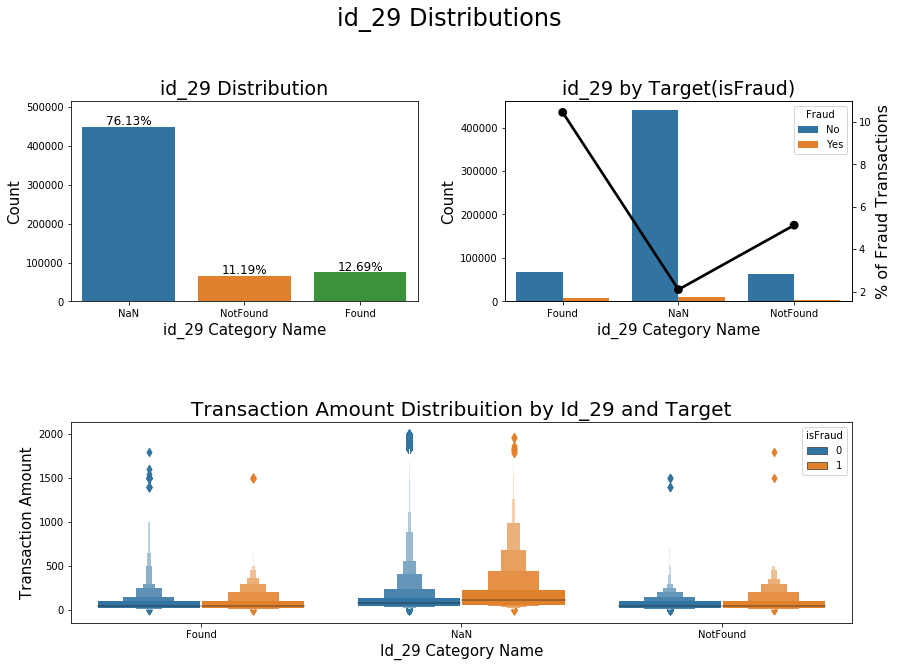

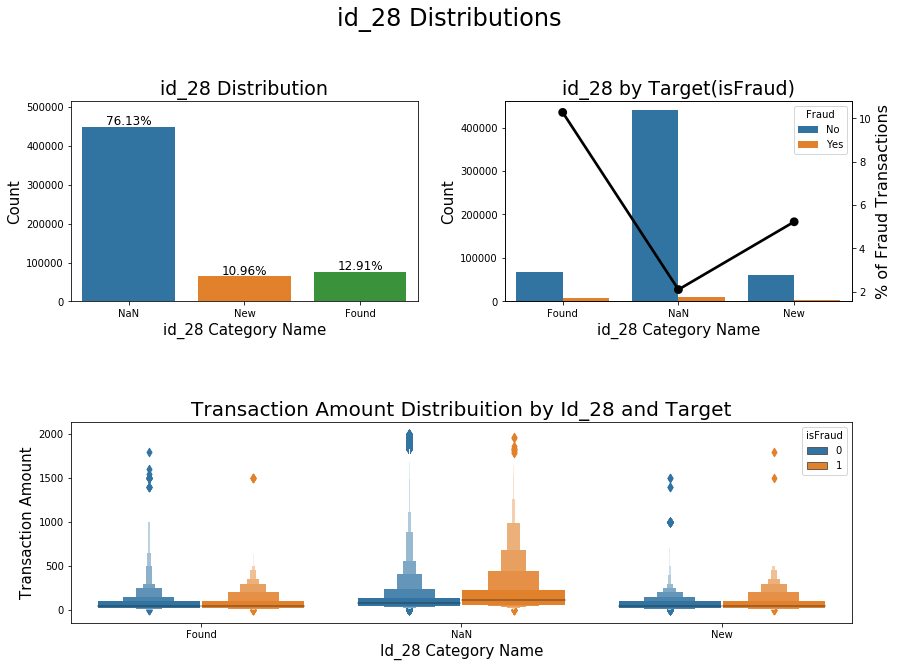

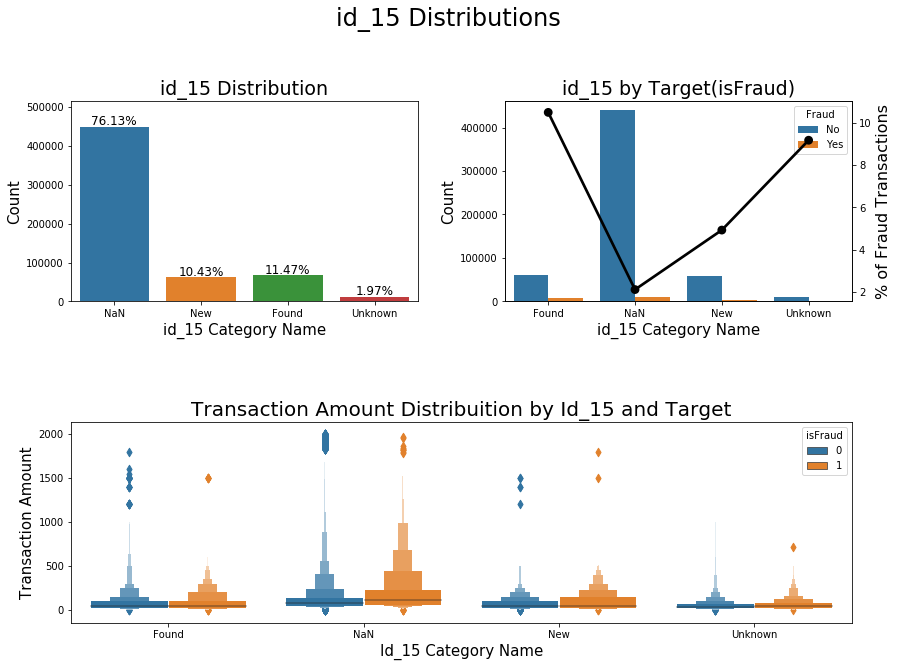

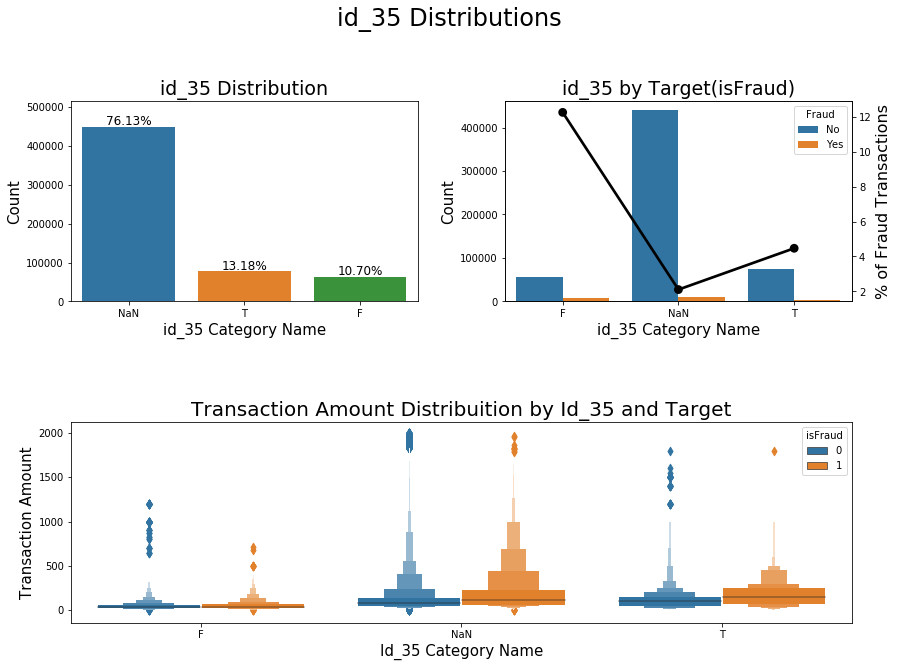

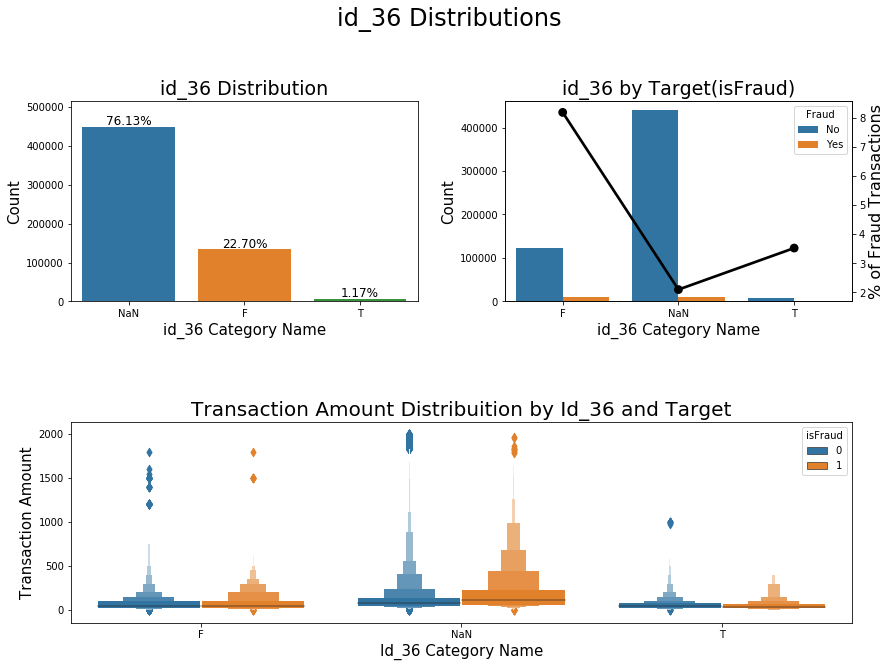

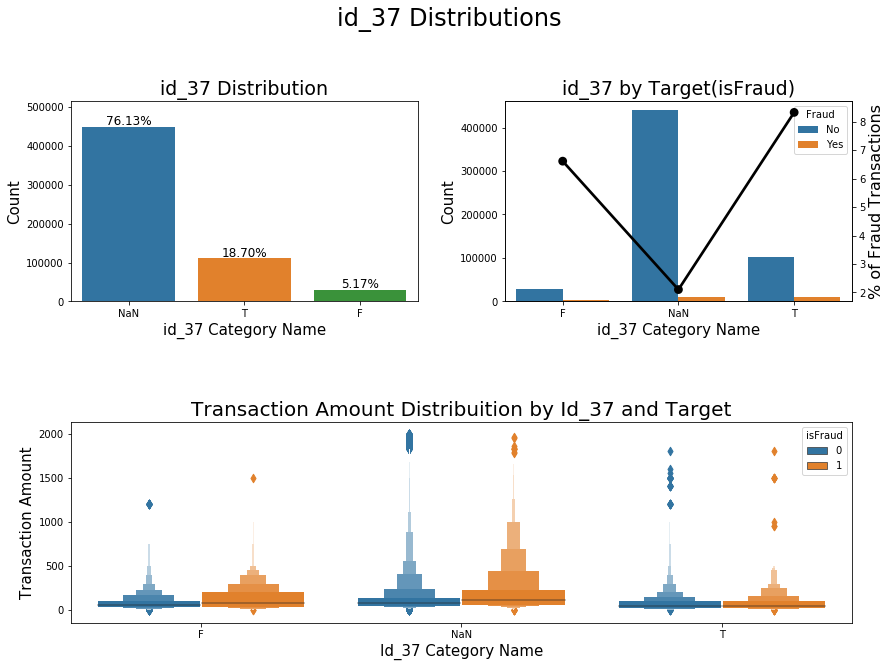

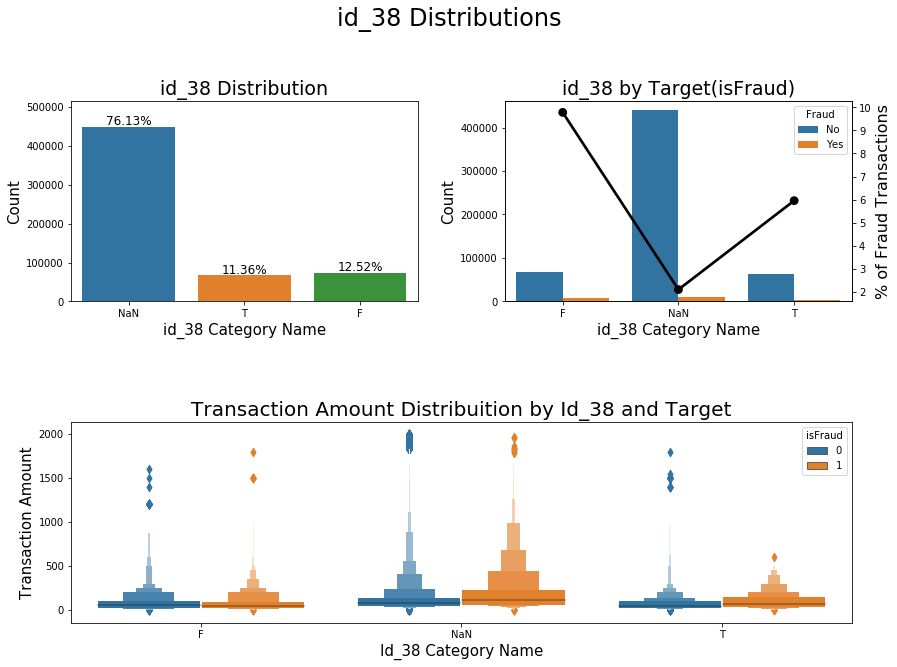

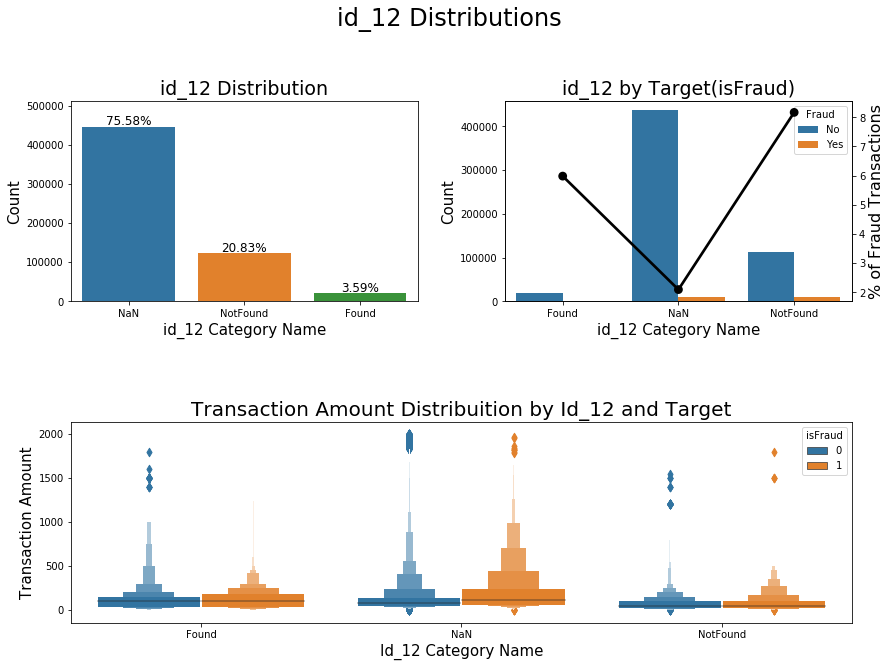

In [311]:
few_category_features = identity_categorical_summary[identity_categorical_summary.Unique < 5]['Name'].values

for feature in few_category_features:
    train_df[feature] = train_df[feature].fillna('NaN')
    plot_categorical_features(train_df, feature)

## Plot Id 30

In [312]:
train_df.loc[train_df['id_30'].str.contains('Windows', na=False), 'id_30'] = 'Windows'
train_df.loc[train_df['id_30'].str.contains('iOS', na=False), 'id_30'] = 'iOS'
train_df.loc[train_df['id_30'].str.contains('Mac OS', na=False), 'id_30'] = 'Mac'
train_df.loc[train_df['id_30'].str.contains('Android', na=False), 'id_30'] = 'Android'

train_df['id_30'].fillna("NAN", inplace=True)

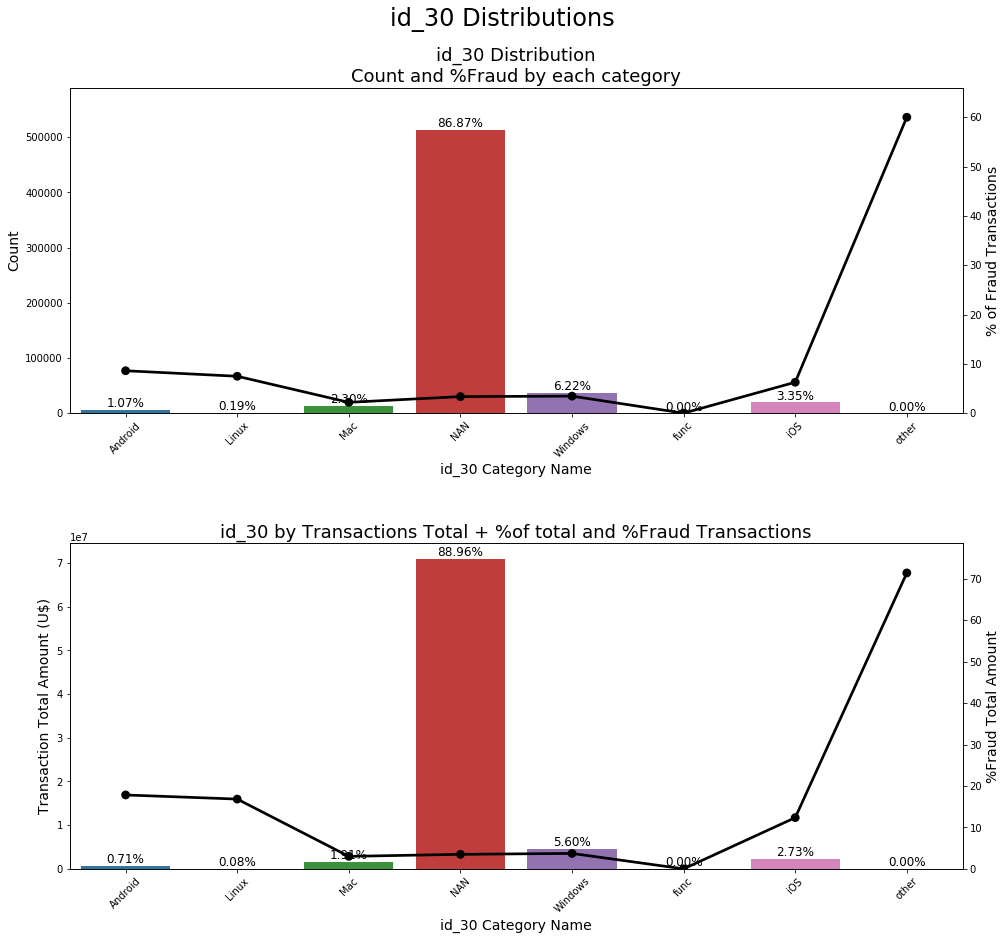

In [316]:
plot_category_count_and_amount_by_fraud_percent(train_df, 'id_30')

## Plot Id 31

In [328]:
train_df.loc[train_df['id_31'].str.contains('chrome', na=False), 'id_31'] = 'Chrome'
train_df.loc[train_df['id_31'].str.contains('safari', na=False), 'id_31'] = 'Safari'
train_df.loc[train_df['id_31'].str.contains('firefox', na=False), 'id_31'] = 'FireFox'
train_df.loc[train_df['id_31'].str.contains('edge', na=False), 'id_31'] = 'Edge'
train_df.loc[train_df['id_31'].str.contains('ie', na=False), 'id_31'] = 'IE'
train_df.loc[train_df['id_31'].str.contains('samsung', na=False), 'id_31'] = 'Samsung'
train_df.loc[train_df['id_31'].str.contains('opera', na=False), 'id_31'] = 'Opera'

train_df['id_31'].fillna("NAN", inplace=True)
train_df.loc[train_df['id_31'].isin(train_df['id_31'].value_counts() \
                                    [train_df['id_31'].value_counts() < 200].index), 'id_31'] = "Others"

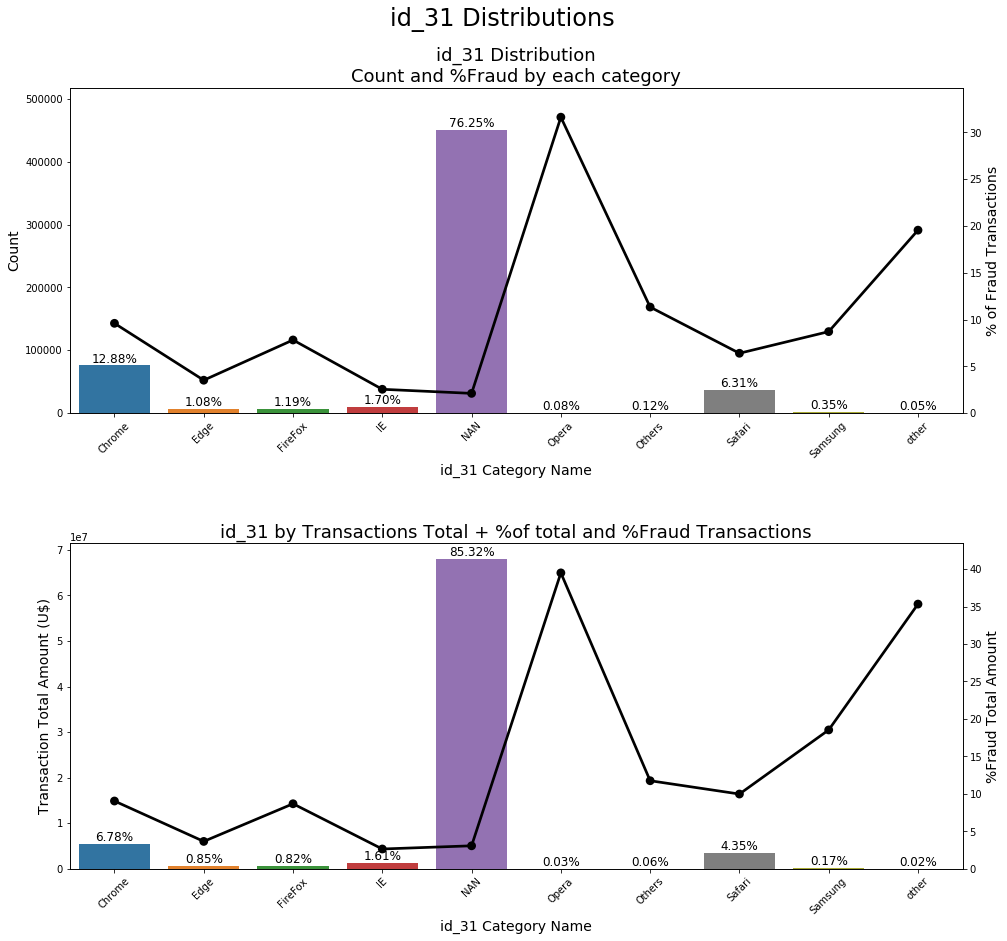

In [329]:
plot_category_count_and_amount_by_fraud_percent(train_df, 'id_31')

## Baseline Model

In [3]:
%%time

base_path = 'C:/Users/VenD/Downloads/ieee-fraud-detection/dataset/'

train_transaction = pd.read_csv(base_path + 'train_transaction.csv', index_col='TransactionID')
test_transaction = pd.read_csv(base_path + 'test_transaction.csv', index_col='TransactionID')

train_identity = pd.read_csv(base_path + 'train_identity.csv', index_col='TransactionID')
test_identity = pd.read_csv(base_path + 'test_identity.csv', index_col='TransactionID')

sample_submission = pd.read_csv(base_path + 'sample_submission.csv', index_col='TransactionID')

train = train_transaction.merge(train_identity, how='left', left_index=True, right_index=True)
test = test_transaction.merge(test_identity, how='left', left_index=True, right_index=True)

print('Train Dataset Shape: ', train.shape)
print('Test Dataset Shape: ', test.shape)

y_train = train['isFraud'].copy()
del train_transaction, train_identity, test_transaction, test_identity

# Drop target, fill in NaNs
X_train = train.drop('isFraud', axis=1)
X_test = test.copy()

del train, test

# Label Encoding
for feature in X_train.columns:
    if X_train[feature].dtype=='object' or X_test[feature].dtype=='object': 
        lbl = preprocessing.LabelEncoder()
        lbl.fit(list(X_train[feature].values) + list(X_test[feature].values))
        X_train[feature] = lbl.transform(list(X_train[feature].values))
        X_test[feature] = lbl.transform(list(X_test[feature].values))

Train Dataset Shape:  (590540, 433)
Test Dataset Shape:  (506691, 432)
Wall time: 2min 19s


In [4]:
%%time

X_train = reduce_memory_usage(X_train)
X_test = reduce_memory_usage(X_test)

Memory usage decreased from 1970.87 Mb to 547.14 Mb (72.2% reduction)
Memory usage decreased from 1673.87 Mb to 460.02 Mb (72.5% reduction)
Wall time: 7min 36s


In [ ]:
%%time

from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score

SPLITS = 3

kf = KFold(n_splits = SPLITS, shuffle = True)

# for cumulative test set predictions on all folds
y_preds = np.zeros(X_test.shape[0])

for tr_idx, val_idx in kf.split(X_train, y_train):
    clf = xgb.XGBClassifier(
        n_estimators=500,
        max_depth=9,
        learning_rate=0.05,
        subsample=0.9,
        colsample_bytree=0.9,
        tree_method='gpu_hist'
    )
    
    X_tr, X_vl = X_train.iloc[tr_idx, :], X_train.iloc[val_idx, :]
    y_tr, y_vl = y_train.iloc[tr_idx], y_train.iloc[val_idx]
    
    # fit model on training set
    clf.fit(X_tr, y_tr)
    
    # predict on validation set
    y_pred_vl = clf.predict_proba(X_vl)[:,1]
    
    # ROC AUC on validation set
    print('ROC AUC {}'.format(roc_auc_score(y_vl, y_pred_vl)))
    
    # predict on test set
    y_preds+= clf.predict_proba(X_test)[:,1] / SPLITS